In [29]:
import re
import numpy as np

# Dữ liệu log (giả sử lưu trong file log.txt hoặc chuỗi string)
log_file = "log multibin.txt"

# Mẫu regex để lọc dòng chứa thông tin quan trọng
pattern = re.compile(r"Epoch #\d+: \d+it.*|Epoch #\d+: test_reward: .*")

# Đọc file log và lọc dòng mong muốn
with open(log_file, "r", encoding="utf-8") as file:
    filtered_lines = [line.strip() for line in file if pattern.search(line)]

log_data = "\n".join(filtered_lines)



In [30]:
import re

# Loại bỏ phần "xxx.xs xx " ở đầu dòng test_reward
cleaned_log = re.sub(r"\d+\.\ds\s+\d+\s+", "", log_data)



In [31]:
# Import Libraries and Data

import re
import matplotlib.pyplot as plt

# Input data
data = cleaned_log 

In [32]:
# Extract Values with Regex

# Define regex patterns to extract loss, test_reward, and best_reward values
loss_pattern = r"loss=(-?\d+\.?\d*)"
loss_clip_pattern = r"loss/clip=(-?\d+\.?\d*)"
loss_ent_pattern = r"loss/ent=(-?\d+\.?\d*)"
loss_vf_pattern = r"loss/vf=(-?\d+\.?\d*)"
reward_pattern = r"rew=([\d.]+)"
test_reward_pattern = r"test_reward: ([\d.]+)"
best_reward_pattern = r"best_reward: ([\d.]+)"

# Extract values using regex patterns
losses = re.findall(loss_pattern, data)
losses_clip = re.findall(loss_clip_pattern, data)
losses_ent = re.findall(loss_ent_pattern, data)
losses_vf = re.findall(loss_vf_pattern, data)
rewards = re.findall(reward_pattern, data)
test_rewards = re.findall(test_reward_pattern, data)
best_rewards = re.findall(best_reward_pattern, data)

# Convert extracted values to float
losses = list(map(float, losses))
losses_clip = list(map(float, losses_clip))
losses_ent = list(map(float, losses_ent))
losses_vf = list(map(float, losses_vf))
rewards = list(map(float, rewards))
test_rewards = list(map(float, test_rewards))
best_rewards = list(map(float, best_rewards))

# Print extracted values for verification
print(losses)
print(losses_clip)
print(losses_ent)
print(losses_vf)
print(rewards)
print(test_rewards)
print(best_rewards)


# Define epochs based on the number of extracted values
epochs = list(range(1, len(losses_clip) + 1))


window_size = 5
padding_size = 2



padded_data = np.pad(test_rewards, (2, 2), mode='edge')

# Tính trung bình 5 phần tử kề nhau
results = np.convolve(padded_data, np.ones(5)/5, mode='valid')


[0.049, 0.022, 0.018, 0.009, 0.013, 0.006, 0.008, 0.063, 0.005, 0.059, 0.015, 0.007, 0.009, 0.004, 0.006, 0.015, 0.004, 0.064, 0.002, 0.004, 0.002, 0.008, 0.002, 0.007, 0.001, 0.003, 0.061, 0.004, 0.009, 0.004, 0.001, 0.007, 0.001, 0.004, 0.004, 0.001, 0.005, 0.002, 0.001, 0.001, 0.0, 0.002, 0.0, -0.0, 0.0, -0.0, -0.001, -0.0, -0.001, -0.001]
[0.0, 0.001, 0.001, -0.001, -0.0, -0.0, -0.001, 0.0, -0.0, 0.004, 0.0, 0.0, 0.001, -0.0, -0.002, 0.001, 0.0, -0.0, -0.001, -0.001, 0.0, -0.002, -0.0, 0.0, -0.0, 0.0, 0.0, 0.001, 0.001, 0.0, 0.0, 0.001, -0.001, 0.0, -0.0, -0.0, 0.001, -0.001, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0]
[1.463, 1.322, 1.294, 1.298, 1.394, 1.437, 1.524, 1.534, 1.569, 1.656, 1.726, 1.673, 1.617, 1.583, 1.562, 1.567, 1.55, 1.509, 1.422, 1.408, 1.428, 1.421, 1.357, 1.347, 1.377, 1.389, 1.33, 1.301, 1.332, 1.353, 1.308, 1.315, 1.272, 1.274, 1.299, 1.282, 1.316, 1.322, 1.367, 1.389, 1.365, 1.337, 1.356, 1.351, 1.342, 1.332, 1.338, 1.333, 1.359, 1.351

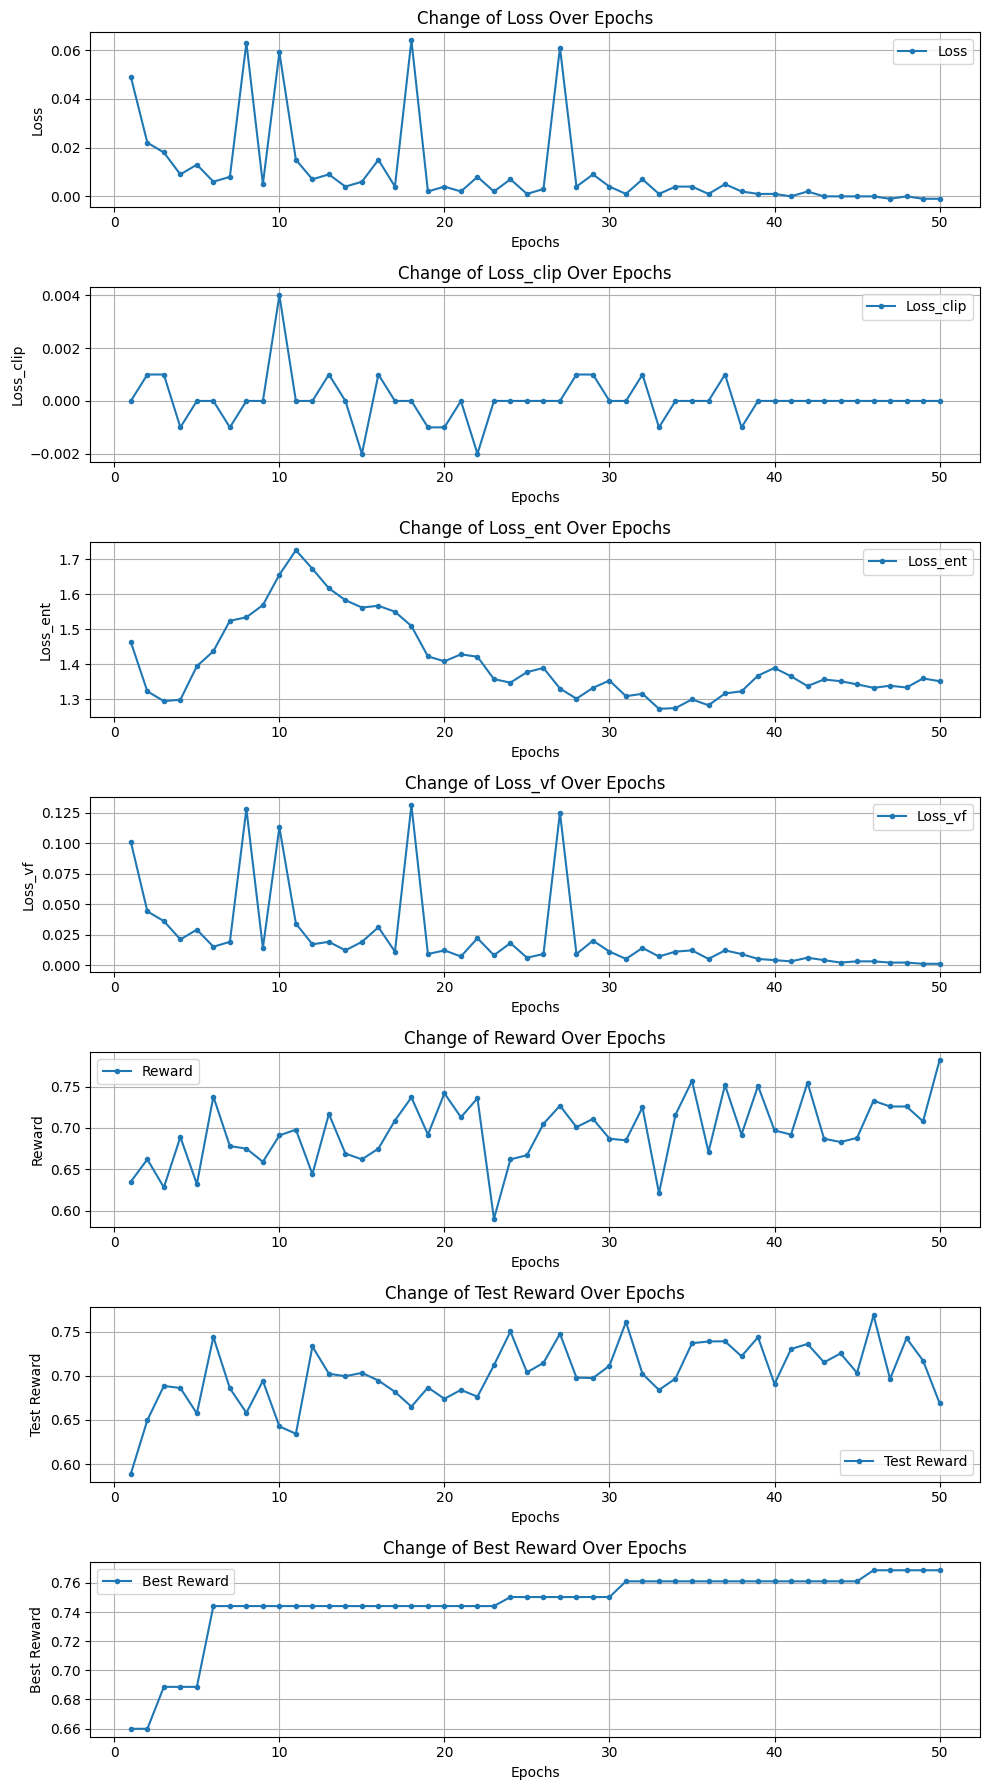

In [33]:
# Create Subplots Layout

# Set up a figure with three subplots
fig1, axs1 = plt.subplots(7, 1, figsize=(10, 18))

# Plot Loss
axs1[0].plot(epochs, losses, label="Loss", marker=".")
axs1[0].set_xlabel("Epochs")
axs1[0].set_ylabel("Loss")
axs1[0].set_title("Change of Loss Over Epochs")
axs1[0].legend()
axs1[0].grid()

axs1[1].plot(epochs, losses_clip, label="Loss_clip", marker=".")
axs1[1].set_xlabel("Epochs")
axs1[1].set_ylabel("Loss_clip")
axs1[1].set_title("Change of Loss_clip Over Epochs")
axs1[1].legend()
axs1[1].grid()

axs1[2].plot(epochs, losses_ent, label="Loss_ent", marker=".")
axs1[2].set_xlabel("Epochs")
axs1[2].set_ylabel("Loss_ent")
axs1[2].set_title("Change of Loss_ent Over Epochs")
axs1[2].legend()
axs1[2].grid()

axs1[3].plot(epochs, losses_vf, label="Loss_vf", marker=".")
axs1[3].set_xlabel("Epochs")
axs1[3].set_ylabel("Loss_vf")
axs1[3].set_title("Change of Loss_vf Over Epochs")
axs1[3].legend()
axs1[3].grid()

axs1[4].plot(epochs, rewards, label="Reward", marker=".")

axs1[4].set_xlabel("Epochs")
axs1[4].set_ylabel("Reward")
axs1[4].set_title("Change of Reward Over Epochs")
axs1[4].legend()
axs1[4].grid()

# Plot Test Reward
axs1[5].plot(epochs, test_rewards, label="Test Reward", marker=".")
#0axs1[5].plot(epochs, results, label="aaa", marker=".")
axs1[5].set_xlabel("Epochs")
axs1[5].set_ylabel("Test Reward")
axs1[5].set_title("Change of Test Reward Over Epochs")
axs1[5].legend()
axs1[5].grid()

# Plot Best Reward
axs1[6].plot(epochs, best_rewards, label="Best Reward", marker=".")
axs1[6].set_xlabel("Epochs")
axs1[6].set_ylabel("Best Reward")
axs1[6].set_title("Change of Best Reward Over Epochs")
axs1[6].legend()
axs1[6].grid()

# Adjust layout
plt.tight_layout()
plt.show()

bin 10

In [34]:
dt = """"
episode 1        =>     ratio: 0.6730   | total: 29
episode 2        =>     ratio: 0.8440   | total: 34
episode 3        =>     ratio: 0.7820   | total: 40
episode 4        =>     ratio: 0.8050   | total: 43
episode 5        =>     ratio: 0.8160   | total: 29
episode 6        =>     ratio: 0.7740   | total: 29
episode 7        =>     ratio: 0.8830   | total: 40
episode 8        =>     ratio: 0.8220   | total: 29
episode 9        =>     ratio: 0.7810   | total: 32
episode 10       =>     ratio: 0.8270   | total: 30
episode 11       =>     ratio: 0.7710   | total: 33
episode 12       =>     ratio: 0.7820   | total: 27
episode 13       =>     ratio: 0.8850   | total: 34
episode 14       =>     ratio: 0.7620   | total: 34
episode 15       =>     ratio: 0.8330   | total: 35
episode 16       =>     ratio: 0.8430   | total: 38
episode 17       =>     ratio: 0.7010   | total: 34
episode 18       =>     ratio: 0.6790   | total: 32
episode 19       =>     ratio: 0.7750   | total: 23
episode 20       =>     ratio: 0.7850   | total: 36
episode 21       =>     ratio: 0.8350   | total: 43
episode 22       =>     ratio: 0.7740   | total: 26
episode 23       =>     ratio: 0.8280   | total: 31
episode 24       =>     ratio: 0.6870   | total: 24
episode 25       =>     ratio: 0.7850   | total: 32
episode 26       =>     ratio: 0.7010   | total: 23
episode 27       =>     ratio: 0.7780   | total: 38
episode 28       =>     ratio: 0.7730   | total: 28
episode 29       =>     ratio: 0.7690   | total: 33
episode 30       =>     ratio: 0.8640   | total: 30
episode 31       =>     ratio: 0.8150   | total: 34
episode 32       =>     ratio: 0.8030   | total: 31
episode 33       =>     ratio: 0.8060   | total: 34
episode 34       =>     ratio: 0.7790   | total: 30
episode 35       =>     ratio: 0.7340   | total: 34
episode 36       =>     ratio: 0.7230   | total: 31
episode 37       =>     ratio: 0.8220   | total: 37
episode 38       =>     ratio: 0.8190   | total: 31
episode 39       =>     ratio: 0.7790   | total: 32
episode 40       =>     ratio: 0.7380   | total: 33
episode 41       =>     ratio: 0.6940   | total: 24
episode 42       =>     ratio: 0.7490   | total: 30
episode 43       =>     ratio: 0.8170   | total: 32
episode 44       =>     ratio: 0.7490   | total: 23
episode 45       =>     ratio: 0.7230   | total: 29
episode 46       =>     ratio: 0.7200   | total: 36
episode 47       =>     ratio: 0.6890   | total: 27
episode 48       =>     ratio: 0.8180   | total: 35
episode 49       =>     ratio: 0.7930   | total: 23
episode 50       =>     ratio: 0.7660   | total: 32
episode 51       =>     ratio: 0.7660   | total: 37
episode 52       =>     ratio: 0.7780   | total: 35
episode 53       =>     ratio: 0.7140   | total: 28
episode 54       =>     ratio: 0.5030   | total: 22
episode 55       =>     ratio: 0.7410   | total: 25
episode 56       =>     ratio: 0.7470   | total: 35
episode 57       =>     ratio: 0.7870   | total: 33
episode 58       =>     ratio: 0.8150   | total: 36
episode 59       =>     ratio: 0.8490   | total: 32
episode 60       =>     ratio: 0.7490   | total: 33
episode 61       =>     ratio: 0.7240   | total: 32
episode 62       =>     ratio: 0.7610   | total: 35
episode 63       =>     ratio: 0.8040   | total: 31
episode 64       =>     ratio: 0.7530   | total: 20
episode 65       =>     ratio: 0.7760   | total: 37
episode 66       =>     ratio: 0.7790   | total: 33
episode 67       =>     ratio: 0.7820   | total: 25
episode 68       =>     ratio: 0.7790   | total: 32
episode 69       =>     ratio: 0.7460   | total: 26
episode 70       =>     ratio: 0.7830   | total: 35
episode 71       =>     ratio: 0.7580   | total: 33
episode 72       =>     ratio: 0.8190   | total: 29
episode 73       =>     ratio: 0.7910   | total: 40
episode 74       =>     ratio: 0.7660   | total: 34
episode 75       =>     ratio: 0.7300   | total: 25
episode 76       =>     ratio: 0.7480   | total: 29
episode 77       =>     ratio: 0.7390   | total: 32
episode 78       =>     ratio: 0.7310   | total: 36
episode 79       =>     ratio: 0.7830   | total: 28
episode 80       =>     ratio: 0.7680   | total: 31
episode 81       =>     ratio: 0.6530   | total: 24
episode 82       =>     ratio: 0.7720   | total: 35
episode 83       =>     ratio: 0.6490   | total: 28
episode 84       =>     ratio: 0.8010   | total: 28
episode 85       =>     ratio: 0.8140   | total: 38
episode 86       =>     ratio: 0.7870   | total: 27
episode 87       =>     ratio: 0.8590   | total: 34
episode 88       =>     ratio: 0.7220   | total: 35
episode 89       =>     ratio: 0.7820   | total: 31
episode 90       =>     ratio: 0.6390   | total: 27
episode 91       =>     ratio: 0.7490   | total: 27
episode 92       =>     ratio: 0.8330   | total: 23
episode 93       =>     ratio: 0.7930   | total: 40
episode 94       =>     ratio: 0.6700   | total: 30
episode 95       =>     ratio: 0.7790   | total: 19
episode 96       =>     ratio: 0.7790   | total: 25
episode 97       =>     ratio: 0.8530   | total: 31
episode 98       =>     ratio: 0.7730   | total: 35
episode 99       =>     ratio: 0.7790   | total: 33
episode 100      =>     ratio: 0.7580   | total: 24
episode 101      =>     ratio: 0.8150   | total: 30
episode 102      =>     ratio: 0.8370   | total: 44
episode 103      =>     ratio: 0.6190   | total: 21
episode 104      =>     ratio: 0.7800   | total: 37
episode 105      =>     ratio: 0.5490   | total: 27
episode 106      =>     ratio: 0.7940   | total: 41
episode 107      =>     ratio: 0.7960   | total: 25
episode 108      =>     ratio: 0.7810   | total: 33
episode 109      =>     ratio: 0.7630   | total: 28
episode 110      =>     ratio: 0.7870   | total: 36
episode 111      =>     ratio: 0.8070   | total: 24
episode 112      =>     ratio: 0.7610   | total: 33
episode 113      =>     ratio: 0.6830   | total: 32
episode 114      =>     ratio: 0.7660   | total: 27
episode 115      =>     ratio: 0.8160   | total: 28
episode 116      =>     ratio: 0.6920   | total: 25
episode 117      =>     ratio: 0.7200   | total: 22
episode 118      =>     ratio: 0.7810   | total: 33
episode 119      =>     ratio: 0.8360   | total: 36
episode 120      =>     ratio: 0.7820   | total: 32
episode 121      =>     ratio: 0.7370   | total: 24
episode 122      =>     ratio: 0.7860   | total: 37
episode 123      =>     ratio: 0.8310   | total: 27
episode 124      =>     ratio: 0.7800   | total: 28
episode 125      =>     ratio: 0.8410   | total: 26
episode 126      =>     ratio: 0.7170   | total: 31
episode 127      =>     ratio: 0.7860   | total: 30
episode 128      =>     ratio: 0.7300   | total: 29
episode 129      =>     ratio: 0.7170   | total: 21
episode 130      =>     ratio: 0.7990   | total: 26
episode 131      =>     ratio: 0.7490   | total: 34
episode 132      =>     ratio: 0.8080   | total: 26
episode 133      =>     ratio: 0.7850   | total: 29
episode 134      =>     ratio: 0.7630   | total: 41
episode 135      =>     ratio: 0.7450   | total: 29
episode 136      =>     ratio: 0.7890   | total: 29
episode 137      =>     ratio: 0.6980   | total: 24
episode 138      =>     ratio: 0.7650   | total: 25
episode 139      =>     ratio: 0.6460   | total: 24
episode 140      =>     ratio: 0.6490   | total: 25
episode 141      =>     ratio: 0.7750   | total: 34
episode 142      =>     ratio: 0.8230   | total: 42
episode 143      =>     ratio: 0.8230   | total: 32
episode 144      =>     ratio: 0.7930   | total: 29
episode 145      =>     ratio: 0.7800   | total: 35
episode 146      =>     ratio: 0.7100   | total: 29
episode 147      =>     ratio: 0.7870   | total: 28
episode 148      =>     ratio: 0.7900   | total: 27
episode 149      =>     ratio: 0.8290   | total: 43
episode 150      =>     ratio: 0.7930   | total: 38
episode 151      =>     ratio: 0.7040   | total: 28
episode 152      =>     ratio: 0.7980   | total: 32
episode 153      =>     ratio: 0.7860   | total: 32
episode 154      =>     ratio: 0.7230   | total: 39
episode 155      =>     ratio: 0.8170   | total: 34
episode 156      =>     ratio: 0.6980   | total: 31
episode 157      =>     ratio: 0.7710   | total: 31
episode 158      =>     ratio: 0.8090   | total: 30
episode 159      =>     ratio: 0.7320   | total: 27
episode 160      =>     ratio: 0.7640   | total: 29
episode 161      =>     ratio: 0.7740   | total: 30
episode 162      =>     ratio: 0.8450   | total: 37
episode 163      =>     ratio: 0.4740   | total: 28
episode 164      =>     ratio: 0.8040   | total: 30
episode 165      =>     ratio: 0.7420   | total: 22
episode 166      =>     ratio: 0.7320   | total: 33
episode 167      =>     ratio: 0.7610   | total: 37
episode 168      =>     ratio: 0.8320   | total: 37
episode 169      =>     ratio: 0.8780   | total: 32
episode 170      =>     ratio: 0.7410   | total: 25
episode 171      =>     ratio: 0.7530   | total: 34
episode 172      =>     ratio: 0.7080   | total: 24
episode 173      =>     ratio: 0.7910   | total: 34
episode 174      =>     ratio: 0.6150   | total: 24
episode 175      =>     ratio: 0.6730   | total: 23
episode 176      =>     ratio: 0.7630   | total: 27
episode 177      =>     ratio: 0.9030   | total: 34
episode 178      =>     ratio: 0.7620   | total: 28
episode 179      =>     ratio: 0.7190   | total: 25
episode 180      =>     ratio: 0.7200   | total: 26
episode 181      =>     ratio: 0.7360   | total: 38
episode 182      =>     ratio: 0.8580   | total: 39
episode 183      =>     ratio: 0.7170   | total: 23
episode 184      =>     ratio: 0.8430   | total: 39
episode 185      =>     ratio: 0.7290   | total: 30
episode 186      =>     ratio: 0.8180   | total: 39
episode 187      =>     ratio: 0.8100   | total: 28
episode 188      =>     ratio: 0.7940   | total: 33
episode 189      =>     ratio: 0.6980   | total: 26
episode 190      =>     ratio: 0.6940   | total: 36
episode 191      =>     ratio: 0.7690   | total: 23
episode 192      =>     ratio: 0.7360   | total: 40
episode 193      =>     ratio: 0.6780   | total: 31
episode 194      =>     ratio: 0.7470   | total: 32
episode 195      =>     ratio: 0.7670   | total: 39
episode 196      =>     ratio: 0.7770   | total: 29
episode 197      =>     ratio: 0.7710   | total: 33
episode 198      =>     ratio: 0.7690   | total: 33
episode 199      =>     ratio: 0.7260   | total: 35
episode 200      =>     ratio: 0.7950   | total: 29
episode 201      =>     ratio: 0.7140   | total: 29
episode 202      =>     ratio: 0.7970   | total: 25
episode 203      =>     ratio: 0.8140   | total: 36
episode 204      =>     ratio: 0.7880   | total: 35
episode 205      =>     ratio: 0.7700   | total: 28
episode 206      =>     ratio: 0.7240   | total: 30
episode 207      =>     ratio: 0.7380   | total: 24
episode 208      =>     ratio: 0.8100   | total: 28
episode 209      =>     ratio: 0.7640   | total: 26
episode 210      =>     ratio: 0.7600   | total: 33
episode 211      =>     ratio: 0.7860   | total: 25
episode 212      =>     ratio: 0.7800   | total: 31
episode 213      =>     ratio: 0.6840   | total: 36
episode 214      =>     ratio: 0.7300   | total: 36
episode 215      =>     ratio: 0.7540   | total: 36
episode 216      =>     ratio: 0.7400   | total: 26
episode 217      =>     ratio: 0.6480   | total: 24
episode 218      =>     ratio: 0.8380   | total: 28
episode 219      =>     ratio: 0.8660   | total: 38
episode 220      =>     ratio: 0.7590   | total: 30
episode 221      =>     ratio: 0.7760   | total: 45
episode 222      =>     ratio: 0.7510   | total: 21
episode 223      =>     ratio: 0.7120   | total: 32
episode 224      =>     ratio: 0.7720   | total: 40
episode 225      =>     ratio: 0.6470   | total: 31
episode 226      =>     ratio: 0.8130   | total: 33
episode 227      =>     ratio: 0.8000   | total: 35
episode 228      =>     ratio: 0.8250   | total: 31
episode 229      =>     ratio: 0.7070   | total: 24
episode 230      =>     ratio: 0.7040   | total: 31
episode 231      =>     ratio: 0.8040   | total: 24
episode 232      =>     ratio: 0.7140   | total: 33
episode 233      =>     ratio: 0.7610   | total: 32
episode 234      =>     ratio: 0.8720   | total: 36
episode 235      =>     ratio: 0.7160   | total: 33
episode 236      =>     ratio: 0.7610   | total: 30
episode 237      =>     ratio: 0.8570   | total: 36
episode 238      =>     ratio: 0.7510   | total: 31
episode 239      =>     ratio: 0.8190   | total: 36
episode 240      =>     ratio: 0.5330   | total: 15
episode 241      =>     ratio: 0.7380   | total: 30
episode 242      =>     ratio: 0.7340   | total: 27
episode 243      =>     ratio: 0.7260   | total: 34
episode 244      =>     ratio: 0.8080   | total: 34
episode 245      =>     ratio: 0.8110   | total: 22
episode 246      =>     ratio: 0.6930   | total: 22
episode 247      =>     ratio: 0.8340   | total: 35
episode 248      =>     ratio: 0.6940   | total: 29
episode 249      =>     ratio: 0.7760   | total: 30
episode 250      =>     ratio: 0.7660   | total: 25
episode 251      =>     ratio: 0.7700   | total: 31
episode 252      =>     ratio: 0.8230   | total: 38
episode 253      =>     ratio: 0.8360   | total: 30
episode 254      =>     ratio: 0.7480   | total: 18
episode 255      =>     ratio: 0.7630   | total: 33
episode 256      =>     ratio: 0.7120   | total: 23
episode 257      =>     ratio: 0.8370   | total: 39
episode 258      =>     ratio: 0.8290   | total: 39
episode 259      =>     ratio: 0.7840   | total: 40
episode 260      =>     ratio: 0.6930   | total: 21
episode 261      =>     ratio: 0.8750   | total: 32
episode 262      =>     ratio: 0.7090   | total: 27
episode 263      =>     ratio: 0.7170   | total: 32
episode 264      =>     ratio: 0.7350   | total: 31
episode 265      =>     ratio: 0.6590   | total: 28
episode 266      =>     ratio: 0.8040   | total: 27
episode 267      =>     ratio: 0.9000   | total: 33
episode 268      =>     ratio: 0.7590   | total: 25
episode 269      =>     ratio: 0.8100   | total: 32
episode 270      =>     ratio: 0.7670   | total: 33
episode 271      =>     ratio: 0.5890   | total: 22
episode 272      =>     ratio: 0.8370   | total: 32
episode 273      =>     ratio: 0.8530   | total: 28
episode 274      =>     ratio: 0.7410   | total: 31
episode 275      =>     ratio: 0.6780   | total: 29
episode 276      =>     ratio: 0.8500   | total: 33
episode 277      =>     ratio: 0.7330   | total: 35
episode 278      =>     ratio: 0.8100   | total: 27
episode 279      =>     ratio: 0.8350   | total: 29
episode 280      =>     ratio: 0.6470   | total: 25
episode 281      =>     ratio: 0.6650   | total: 24
episode 282      =>     ratio: 0.7180   | total: 35
episode 283      =>     ratio: 0.8020   | total: 38
episode 284      =>     ratio: 0.7770   | total: 39
episode 285      =>     ratio: 0.8080   | total: 39
episode 286      =>     ratio: 0.7720   | total: 27
episode 287      =>     ratio: 0.7460   | total: 38
episode 288      =>     ratio: 0.7790   | total: 39
episode 289      =>     ratio: 0.7570   | total: 32
episode 290      =>     ratio: 0.8510   | total: 40
episode 291      =>     ratio: 0.7000   | total: 24
episode 292      =>     ratio: 0.8240   | total: 35
episode 293      =>     ratio: 0.8160   | total: 34
episode 294      =>     ratio: 0.7780   | total: 28
episode 295      =>     ratio: 0.7800   | total: 32
episode 296      =>     ratio: 0.8640   | total: 30
episode 297      =>     ratio: 0.7990   | total: 34
episode 298      =>     ratio: 0.7860   | total: 45
episode 299      =>     ratio: 0.8390   | total: 28
episode 300      =>     ratio: 0.6270   | total: 25
episode 301      =>     ratio: 0.7090   | total: 27
episode 302      =>     ratio: 0.6780   | total: 23
episode 303      =>     ratio: 0.6650   | total: 29
episode 304      =>     ratio: 0.6580   | total: 26
episode 305      =>     ratio: 0.6540   | total: 21
episode 306      =>     ratio: 0.6440   | total: 38
episode 307      =>     ratio: 0.6150   | total: 27
episode 308      =>     ratio: 0.7350   | total: 32
episode 309      =>     ratio: 0.7400   | total: 29
episode 310      =>     ratio: 0.8460   | total: 32
episode 311      =>     ratio: 0.7420   | total: 24
episode 312      =>     ratio: 0.7820   | total: 35
episode 313      =>     ratio: 0.8070   | total: 33
episode 314      =>     ratio: 0.8130   | total: 36
episode 315      =>     ratio: 0.7630   | total: 34
episode 316      =>     ratio: 0.7610   | total: 31
episode 317      =>     ratio: 0.7850   | total: 34
episode 318      =>     ratio: 0.7140   | total: 26
episode 319      =>     ratio: 0.8340   | total: 28
episode 320      =>     ratio: 0.7060   | total: 30
episode 321      =>     ratio: 0.7930   | total: 34
episode 322      =>     ratio: 0.7000   | total: 29
episode 323      =>     ratio: 0.7310   | total: 20
episode 324      =>     ratio: 0.6470   | total: 24
episode 325      =>     ratio: 0.8780   | total: 31
episode 326      =>     ratio: 0.8020   | total: 30
episode 327      =>     ratio: 0.7690   | total: 26
episode 328      =>     ratio: 0.8040   | total: 27
episode 329      =>     ratio: 0.7780   | total: 32
episode 330      =>     ratio: 0.7810   | total: 31
episode 331      =>     ratio: 0.7670   | total: 29
episode 332      =>     ratio: 0.6850   | total: 32
episode 333      =>     ratio: 0.6690   | total: 35
episode 334      =>     ratio: 0.7230   | total: 31
episode 335      =>     ratio: 0.7430   | total: 31
episode 336      =>     ratio: 0.7780   | total: 29
episode 337      =>     ratio: 0.7780   | total: 32
episode 338      =>     ratio: 0.6990   | total: 25
episode 339      =>     ratio: 0.8390   | total: 36
episode 340      =>     ratio: 0.7720   | total: 29
episode 341      =>     ratio: 0.7770   | total: 31
episode 342      =>     ratio: 0.7810   | total: 38
episode 343      =>     ratio: 0.7170   | total: 21
episode 344      =>     ratio: 0.8400   | total: 31
episode 345      =>     ratio: 0.7610   | total: 34
episode 346      =>     ratio: 0.7690   | total: 35
episode 347      =>     ratio: 0.7790   | total: 31
episode 348      =>     ratio: 0.8070   | total: 33
episode 349      =>     ratio: 0.7800   | total: 39
episode 350      =>     ratio: 0.7670   | total: 28
episode 351      =>     ratio: 0.7840   | total: 33
episode 352      =>     ratio: 0.8130   | total: 30
episode 353      =>     ratio: 0.7700   | total: 27
episode 354      =>     ratio: 0.7190   | total: 28
episode 355      =>     ratio: 0.8300   | total: 29
episode 356      =>     ratio: 0.8110   | total: 26
episode 357      =>     ratio: 0.7710   | total: 38
episode 358      =>     ratio: 0.7400   | total: 28
episode 359      =>     ratio: 0.8030   | total: 29
episode 360      =>     ratio: 0.8270   | total: 37
episode 361      =>     ratio: 0.7970   | total: 37
episode 362      =>     ratio: 0.7390   | total: 32
episode 363      =>     ratio: 0.7730   | total: 27
episode 364      =>     ratio: 0.7480   | total: 26
episode 365      =>     ratio: 0.7590   | total: 31
episode 366      =>     ratio: 0.8230   | total: 31
episode 367      =>     ratio: 0.7350   | total: 32
episode 368      =>     ratio: 0.8240   | total: 28
episode 369      =>     ratio: 0.7320   | total: 33
episode 370      =>     ratio: 0.6950   | total: 27
episode 371      =>     ratio: 0.7530   | total: 28
episode 372      =>     ratio: 0.6700   | total: 23
episode 373      =>     ratio: 0.7730   | total: 32
episode 374      =>     ratio: 0.7600   | total: 26
episode 375      =>     ratio: 0.8150   | total: 30
episode 376      =>     ratio: 0.7960   | total: 35
episode 377      =>     ratio: 0.8000   | total: 39
episode 378      =>     ratio: 0.7810   | total: 32
episode 379      =>     ratio: 0.7580   | total: 36
episode 380      =>     ratio: 0.8390   | total: 33
episode 381      =>     ratio: 0.8240   | total: 35
episode 382      =>     ratio: 0.7120   | total: 32
episode 383      =>     ratio: 0.8540   | total: 47
episode 384      =>     ratio: 0.8370   | total: 40
episode 385      =>     ratio: 0.6360   | total: 35
episode 386      =>     ratio: 0.6540   | total: 27
episode 387      =>     ratio: 0.6980   | total: 26
episode 388      =>     ratio: 0.7430   | total: 22
episode 389      =>     ratio: 0.7930   | total: 28
episode 390      =>     ratio: 0.7310   | total: 25
episode 391      =>     ratio: 0.8340   | total: 32
episode 392      =>     ratio: 0.7450   | total: 28
episode 393      =>     ratio: 0.7400   | total: 26
episode 394      =>     ratio: 0.7620   | total: 31
episode 395      =>     ratio: 0.8190   | total: 25
episode 396      =>     ratio: 0.7130   | total: 27
episode 397      =>     ratio: 0.7410   | total: 42
episode 398      =>     ratio: 0.8230   | total: 25
episode 399      =>     ratio: 0.8480   | total: 40
episode 400      =>     ratio: 0.8070   | total: 26
episode 401      =>     ratio: 0.8370   | total: 36
episode 402      =>     ratio: 0.7100   | total: 24
episode 403      =>     ratio: 0.7960   | total: 34
episode 404      =>     ratio: 0.8390   | total: 26
episode 405      =>     ratio: 0.8180   | total: 33
episode 406      =>     ratio: 0.7970   | total: 40
episode 407      =>     ratio: 0.7020   | total: 37
episode 408      =>     ratio: 0.7800   | total: 31
episode 409      =>     ratio: 0.8170   | total: 29
episode 410      =>     ratio: 0.7290   | total: 27
episode 411      =>     ratio: 0.6810   | total: 28
episode 412      =>     ratio: 0.8220   | total: 35
episode 413      =>     ratio: 0.8640   | total: 45
episode 414      =>     ratio: 0.7710   | total: 41
episode 415      =>     ratio: 0.8250   | total: 47
episode 416      =>     ratio: 0.8040   | total: 27
episode 417      =>     ratio: 0.5900   | total: 22
episode 418      =>     ratio: 0.8690   | total: 31
episode 419      =>     ratio: 0.7460   | total: 32
episode 420      =>     ratio: 0.7770   | total: 29
episode 421      =>     ratio: 0.7660   | total: 32
episode 422      =>     ratio: 0.7810   | total: 41
episode 423      =>     ratio: 0.7890   | total: 32
episode 424      =>     ratio: 0.7680   | total: 40
episode 425      =>     ratio: 0.8140   | total: 27
episode 426      =>     ratio: 0.7890   | total: 27
episode 427      =>     ratio: 0.7230   | total: 35
episode 428      =>     ratio: 0.9130   | total: 39
episode 429      =>     ratio: 0.8680   | total: 37
episode 430      =>     ratio: 0.7860   | total: 31
episode 431      =>     ratio: 0.7780   | total: 45
episode 432      =>     ratio: 0.8430   | total: 29
episode 433      =>     ratio: 0.7760   | total: 34
episode 434      =>     ratio: 0.6610   | total: 33
episode 435      =>     ratio: 0.8100   | total: 24
episode 436      =>     ratio: 0.8120   | total: 34
episode 437      =>     ratio: 0.8440   | total: 25
episode 438      =>     ratio: 0.6850   | total: 24
episode 439      =>     ratio: 0.6800   | total: 31
episode 440      =>     ratio: 0.7220   | total: 29
episode 441      =>     ratio: 0.7860   | total: 38
episode 442      =>     ratio: 0.7520   | total: 28
episode 443      =>     ratio: 0.7470   | total: 38
episode 444      =>     ratio: 0.8010   | total: 33
episode 445      =>     ratio: 0.7980   | total: 34
episode 446      =>     ratio: 0.7270   | total: 31
episode 447      =>     ratio: 0.7330   | total: 27
episode 448      =>     ratio: 0.7020   | total: 19
episode 449      =>     ratio: 0.8070   | total: 20
episode 450      =>     ratio: 0.7570   | total: 25
episode 451      =>     ratio: 0.8410   | total: 38
episode 452      =>     ratio: 0.7700   | total: 40
episode 453      =>     ratio: 0.7980   | total: 37
episode 454      =>     ratio: 0.7270   | total: 35
episode 455      =>     ratio: 0.7410   | total: 37
episode 456      =>     ratio: 0.7320   | total: 39
episode 457      =>     ratio: 0.7860   | total: 28
episode 458      =>     ratio: 0.7860   | total: 31
episode 459      =>     ratio: 0.8050   | total: 30
episode 460      =>     ratio: 0.7080   | total: 23
episode 461      =>     ratio: 0.8330   | total: 34
episode 462      =>     ratio: 0.8320   | total: 29
episode 463      =>     ratio: 0.7970   | total: 30
episode 464      =>     ratio: 0.8090   | total: 41
episode 465      =>     ratio: 0.8120   | total: 30
episode 466      =>     ratio: 0.6160   | total: 24
episode 467      =>     ratio: 0.8300   | total: 34
episode 468      =>     ratio: 0.7820   | total: 38
episode 469      =>     ratio: 0.7770   | total: 34
episode 470      =>     ratio: 0.7840   | total: 41
episode 471      =>     ratio: 0.8070   | total: 33
episode 472      =>     ratio: 0.7390   | total: 31
episode 473      =>     ratio: 0.8180   | total: 26
episode 474      =>     ratio: 0.7410   | total: 33
episode 475      =>     ratio: 0.8220   | total: 24
episode 476      =>     ratio: 0.7460   | total: 28
episode 477      =>     ratio: 0.7960   | total: 27
episode 478      =>     ratio: 0.7480   | total: 30
episode 479      =>     ratio: 0.8560   | total: 45
episode 480      =>     ratio: 0.7280   | total: 31
episode 481      =>     ratio: 0.7600   | total: 29
episode 482      =>     ratio: 0.7520   | total: 27
episode 483      =>     ratio: 0.6970   | total: 29
episode 484      =>     ratio: 0.7840   | total: 36
episode 485      =>     ratio: 0.7360   | total: 28
episode 486      =>     ratio: 0.7680   | total: 28
episode 487      =>     ratio: 0.6140   | total: 36
episode 488      =>     ratio: 0.7220   | total: 26
episode 489      =>     ratio: 0.7120   | total: 28
episode 490      =>     ratio: 0.8220   | total: 31
episode 491      =>     ratio: 0.8120   | total: 27
episode 492      =>     ratio: 0.7660   | total: 32
episode 493      =>     ratio: 0.8180   | total: 36
episode 494      =>     ratio: 0.8580   | total: 35
episode 495      =>     ratio: 0.7810   | total: 31
episode 496      =>     ratio: 0.8120   | total: 22
episode 497      =>     ratio: 0.6880   | total: 34
episode 498      =>     ratio: 0.7670   | total: 29
episode 499      =>     ratio: 0.8030   | total: 28
episode 500      =>     ratio: 0.8170   | total: 40
episode 501      =>     ratio: 0.8630   | total: 31
episode 502      =>     ratio: 0.6690   | total: 31
episode 503      =>     ratio: 0.6990   | total: 33
episode 504      =>     ratio: 0.6560   | total: 29
episode 505      =>     ratio: 0.7970   | total: 35
episode 506      =>     ratio: 0.7320   | total: 29
episode 507      =>     ratio: 0.8060   | total: 32
episode 508      =>     ratio: 0.7070   | total: 31
episode 509      =>     ratio: 0.7720   | total: 33
episode 510      =>     ratio: 0.7800   | total: 30
episode 511      =>     ratio: 0.8160   | total: 41
episode 512      =>     ratio: 0.8210   | total: 22
episode 513      =>     ratio: 0.8360   | total: 30
episode 514      =>     ratio: 0.7080   | total: 23
episode 515      =>     ratio: 0.7040   | total: 22
episode 516      =>     ratio: 0.8010   | total: 32
episode 517      =>     ratio: 0.7730   | total: 26
episode 518      =>     ratio: 0.7820   | total: 33
episode 519      =>     ratio: 0.7010   | total: 28
episode 520      =>     ratio: 0.8350   | total: 26
episode 521      =>     ratio: 0.7630   | total: 33
episode 522      =>     ratio: 0.7480   | total: 27
episode 523      =>     ratio: 0.7780   | total: 33
episode 524      =>     ratio: 0.7060   | total: 29
episode 525      =>     ratio: 0.7100   | total: 27
episode 526      =>     ratio: 0.8240   | total: 24
episode 527      =>     ratio: 0.7640   | total: 25
episode 528      =>     ratio: 0.7520   | total: 26
episode 529      =>     ratio: 0.8280   | total: 37
episode 530      =>     ratio: 0.7430   | total: 29
episode 531      =>     ratio: 0.8470   | total: 32
episode 532      =>     ratio: 0.7700   | total: 33
episode 533      =>     ratio: 0.7520   | total: 28
episode 534      =>     ratio: 0.8250   | total: 34
episode 535      =>     ratio: 0.7920   | total: 34
episode 536      =>     ratio: 0.7730   | total: 36
episode 537      =>     ratio: 0.8710   | total: 45
episode 538      =>     ratio: 0.7240   | total: 31
episode 539      =>     ratio: 0.7240   | total: 29
episode 540      =>     ratio: 0.7660   | total: 32
episode 541      =>     ratio: 0.8190   | total: 42
episode 542      =>     ratio: 0.8050   | total: 32
episode 543      =>     ratio: 0.8170   | total: 31
episode 544      =>     ratio: 0.6770   | total: 26
episode 545      =>     ratio: 0.7040   | total: 27
episode 546      =>     ratio: 0.6720   | total: 34
episode 547      =>     ratio: 0.8060   | total: 29
episode 548      =>     ratio: 0.7530   | total: 33
episode 549      =>     ratio: 0.7250   | total: 31
episode 550      =>     ratio: 0.7930   | total: 33
episode 551      =>     ratio: 0.7630   | total: 36
episode 552      =>     ratio: 0.8520   | total: 33
episode 553      =>     ratio: 0.7700   | total: 28
episode 554      =>     ratio: 0.8060   | total: 34
episode 555      =>     ratio: 0.6580   | total: 28
episode 556      =>     ratio: 0.7410   | total: 29
episode 557      =>     ratio: 0.8190   | total: 42
episode 558      =>     ratio: 0.7160   | total: 39
episode 559      =>     ratio: 0.8320   | total: 34
episode 560      =>     ratio: 0.7930   | total: 27
episode 561      =>     ratio: 0.6580   | total: 34
episode 562      =>     ratio: 0.7290   | total: 28
episode 563      =>     ratio: 0.7850   | total: 30
episode 564      =>     ratio: 0.8370   | total: 38
episode 565      =>     ratio: 0.7550   | total: 40
episode 566      =>     ratio: 0.7850   | total: 36
episode 567      =>     ratio: 0.8200   | total: 28
episode 568      =>     ratio: 0.8540   | total: 25
episode 569      =>     ratio: 0.8540   | total: 35
episode 570      =>     ratio: 0.7570   | total: 33
episode 571      =>     ratio: 0.6760   | total: 19
episode 572      =>     ratio: 0.7430   | total: 36
episode 573      =>     ratio: 0.8190   | total: 36
episode 574      =>     ratio: 0.7290   | total: 31
episode 575      =>     ratio: 0.8410   | total: 37
episode 576      =>     ratio: 0.6820   | total: 36
episode 577      =>     ratio: 0.7570   | total: 43
episode 578      =>     ratio: 0.5740   | total: 20
episode 579      =>     ratio: 0.7560   | total: 32
episode 580      =>     ratio: 0.7340   | total: 28
episode 581      =>     ratio: 0.7780   | total: 26
episode 582      =>     ratio: 0.8220   | total: 41
episode 583      =>     ratio: 0.7750   | total: 26
episode 584      =>     ratio: 0.7720   | total: 38
episode 585      =>     ratio: 0.8270   | total: 26
episode 586      =>     ratio: 0.7880   | total: 39
episode 587      =>     ratio: 0.7340   | total: 18
episode 588      =>     ratio: 0.7670   | total: 25
episode 589      =>     ratio: 0.7910   | total: 30
episode 590      =>     ratio: 0.7080   | total: 26
episode 591      =>     ratio: 0.8450   | total: 30
episode 592      =>     ratio: 0.7680   | total: 32
episode 593      =>     ratio: 0.6100   | total: 28
episode 594      =>     ratio: 0.8190   | total: 57
episode 595      =>     ratio: 0.7730   | total: 22
episode 596      =>     ratio: 0.8060   | total: 31
episode 597      =>     ratio: 0.7550   | total: 29
episode 598      =>     ratio: 0.7980   | total: 34
episode 599      =>     ratio: 0.7700   | total: 33
episode 600      =>     ratio: 0.7440   | total: 30
episode 601      =>     ratio: 0.8050   | total: 34
episode 602      =>     ratio: 0.7620   | total: 26
episode 603      =>     ratio: 0.7680   | total: 29
episode 604      =>     ratio: 0.8190   | total: 32
episode 605      =>     ratio: 0.7180   | total: 28
episode 606      =>     ratio: 0.7950   | total: 40
episode 607      =>     ratio: 0.6460   | total: 24
episode 608      =>     ratio: 0.8220   | total: 37
episode 609      =>     ratio: 0.7750   | total: 28
episode 610      =>     ratio: 0.8210   | total: 38
episode 611      =>     ratio: 0.7300   | total: 26
episode 612      =>     ratio: 0.8870   | total: 26
episode 613      =>     ratio: 0.6110   | total: 28
episode 614      =>     ratio: 0.7580   | total: 32
episode 615      =>     ratio: 0.7920   | total: 31
episode 616      =>     ratio: 0.5990   | total: 25
episode 617      =>     ratio: 0.7040   | total: 31
episode 618      =>     ratio: 0.7870   | total: 31
episode 619      =>     ratio: 0.8270   | total: 37
episode 620      =>     ratio: 0.7340   | total: 25
episode 621      =>     ratio: 0.7180   | total: 33
episode 622      =>     ratio: 0.7100   | total: 28
episode 623      =>     ratio: 0.7860   | total: 31
episode 624      =>     ratio: 0.6640   | total: 22
episode 625      =>     ratio: 0.7570   | total: 34
episode 626      =>     ratio: 0.6780   | total: 26
episode 627      =>     ratio: 0.6810   | total: 26
episode 628      =>     ratio: 0.8150   | total: 38
episode 629      =>     ratio: 0.8420   | total: 35
episode 630      =>     ratio: 0.8370   | total: 35
episode 631      =>     ratio: 0.5130   | total: 21
episode 632      =>     ratio: 0.7450   | total: 29
episode 633      =>     ratio: 0.8180   | total: 26
episode 634      =>     ratio: 0.7710   | total: 46
episode 635      =>     ratio: 0.7300   | total: 24
episode 636      =>     ratio: 0.8870   | total: 39
episode 637      =>     ratio: 0.8120   | total: 27
episode 638      =>     ratio: 0.7090   | total: 32
episode 639      =>     ratio: 0.8010   | total: 29
episode 640      =>     ratio: 0.8120   | total: 32
episode 641      =>     ratio: 0.7250   | total: 29
episode 642      =>     ratio: 0.7020   | total: 30
episode 643      =>     ratio: 0.8070   | total: 36
episode 644      =>     ratio: 0.8170   | total: 28
episode 645      =>     ratio: 0.7740   | total: 36
episode 646      =>     ratio: 0.7680   | total: 27
episode 647      =>     ratio: 0.6650   | total: 25
episode 648      =>     ratio: 0.7570   | total: 31
episode 649      =>     ratio: 0.8450   | total: 35
episode 650      =>     ratio: 0.6730   | total: 28
episode 651      =>     ratio: 0.7860   | total: 36
episode 652      =>     ratio: 0.7570   | total: 26
episode 653      =>     ratio: 0.7780   | total: 31
episode 654      =>     ratio: 0.8310   | total: 28
episode 655      =>     ratio: 0.8110   | total: 31
episode 656      =>     ratio: 0.7440   | total: 28
episode 657      =>     ratio: 0.8230   | total: 39
episode 658      =>     ratio: 0.8030   | total: 37
episode 659      =>     ratio: 0.7940   | total: 30
episode 660      =>     ratio: 0.8310   | total: 44
episode 661      =>     ratio: 0.8160   | total: 40
episode 662      =>     ratio: 0.7240   | total: 21
episode 663      =>     ratio: 0.8500   | total: 34
episode 664      =>     ratio: 0.8320   | total: 32
episode 665      =>     ratio: 0.7470   | total: 25
episode 666      =>     ratio: 0.8330   | total: 23
episode 667      =>     ratio: 0.8380   | total: 34
episode 668      =>     ratio: 0.6230   | total: 24
episode 669      =>     ratio: 0.7680   | total: 40
episode 670      =>     ratio: 0.8420   | total: 24
episode 671      =>     ratio: 0.7160   | total: 42
episode 672      =>     ratio: 0.7810   | total: 28
episode 673      =>     ratio: 0.7760   | total: 21
episode 674      =>     ratio: 0.7830   | total: 31
episode 675      =>     ratio: 0.7630   | total: 29
episode 676      =>     ratio: 0.6960   | total: 26
episode 677      =>     ratio: 0.8160   | total: 40
episode 678      =>     ratio: 0.7680   | total: 40
episode 679      =>     ratio: 0.6260   | total: 24
episode 680      =>     ratio: 0.7780   | total: 31
episode 681      =>     ratio: 0.7830   | total: 32
episode 682      =>     ratio: 0.7160   | total: 31
episode 683      =>     ratio: 0.6930   | total: 20
episode 684      =>     ratio: 0.8470   | total: 29
episode 685      =>     ratio: 0.7590   | total: 33
episode 686      =>     ratio: 0.8100   | total: 39
episode 687      =>     ratio: 0.8320   | total: 31
episode 688      =>     ratio: 0.6620   | total: 24
episode 689      =>     ratio: 0.7400   | total: 44
episode 690      =>     ratio: 0.8130   | total: 25
episode 691      =>     ratio: 0.7890   | total: 31
episode 692      =>     ratio: 0.7750   | total: 31
episode 693      =>     ratio: 0.7280   | total: 29
episode 694      =>     ratio: 0.7070   | total: 37
episode 695      =>     ratio: 0.6380   | total: 27
episode 696      =>     ratio: 0.7700   | total: 43
episode 697      =>     ratio: 0.6640   | total: 32
episode 698      =>     ratio: 0.8330   | total: 35
episode 699      =>     ratio: 0.7150   | total: 30
episode 700      =>     ratio: 0.7820   | total: 35
episode 701      =>     ratio: 0.7220   | total: 31
episode 702      =>     ratio: 0.7890   | total: 35
episode 703      =>     ratio: 0.7500   | total: 38
episode 704      =>     ratio: 0.7660   | total: 24
episode 705      =>     ratio: 0.7340   | total: 29
episode 706      =>     ratio: 0.7670   | total: 21
episode 707      =>     ratio: 0.7630   | total: 31
episode 708      =>     ratio: 0.8130   | total: 36
episode 709      =>     ratio: 0.8030   | total: 39
episode 710      =>     ratio: 0.8210   | total: 28
episode 711      =>     ratio: 0.8000   | total: 32
episode 712      =>     ratio: 0.7800   | total: 34
episode 713      =>     ratio: 0.7260   | total: 27
episode 714      =>     ratio: 0.6910   | total: 24
episode 715      =>     ratio: 0.8360   | total: 26
episode 716      =>     ratio: 0.7880   | total: 30
episode 717      =>     ratio: 0.7650   | total: 30
episode 718      =>     ratio: 0.7780   | total: 30
episode 719      =>     ratio: 0.7450   | total: 38
episode 720      =>     ratio: 0.8590   | total: 36
episode 721      =>     ratio: 0.8150   | total: 24
episode 722      =>     ratio: 0.8400   | total: 30
episode 723      =>     ratio: 0.8150   | total: 36
episode 724      =>     ratio: 0.8080   | total: 33
episode 725      =>     ratio: 0.6150   | total: 30
episode 726      =>     ratio: 0.8280   | total: 31
episode 727      =>     ratio: 0.7990   | total: 37
episode 728      =>     ratio: 0.8000   | total: 35
episode 729      =>     ratio: 0.7800   | total: 26
episode 730      =>     ratio: 0.8040   | total: 38
episode 731      =>     ratio: 0.7750   | total: 25
episode 732      =>     ratio: 0.7600   | total: 33
episode 733      =>     ratio: 0.9080   | total: 30
episode 734      =>     ratio: 0.6830   | total: 27
episode 735      =>     ratio: 0.7960   | total: 29
episode 736      =>     ratio: 0.8240   | total: 25
episode 737      =>     ratio: 0.7870   | total: 38
episode 738      =>     ratio: 0.6720   | total: 30
episode 739      =>     ratio: 0.7850   | total: 29
episode 740      =>     ratio: 0.7330   | total: 24
episode 741      =>     ratio: 0.7290   | total: 27
episode 742      =>     ratio: 0.7270   | total: 31
episode 743      =>     ratio: 0.7760   | total: 28
episode 744      =>     ratio: 0.7420   | total: 23
episode 745      =>     ratio: 0.4790   | total: 18
episode 746      =>     ratio: 0.7430   | total: 35
episode 747      =>     ratio: 0.7340   | total: 41
episode 748      =>     ratio: 0.7990   | total: 36
episode 749      =>     ratio: 0.7840   | total: 41
episode 750      =>     ratio: 0.6550   | total: 16
episode 751      =>     ratio: 0.8100   | total: 22
episode 752      =>     ratio: 0.7640   | total: 26
episode 753      =>     ratio: 0.7250   | total: 34
episode 754      =>     ratio: 0.7410   | total: 34
episode 755      =>     ratio: 0.6770   | total: 22
episode 756      =>     ratio: 0.7250   | total: 24
episode 757      =>     ratio: 0.8130   | total: 29
episode 758      =>     ratio: 0.7090   | total: 41
episode 759      =>     ratio: 0.8570   | total: 25
episode 760      =>     ratio: 0.2790   | total: 10
episode 761      =>     ratio: 0.8050   | total: 34
episode 762      =>     ratio: 0.6860   | total: 23
episode 763      =>     ratio: 0.7300   | total: 37
episode 764      =>     ratio: 0.8310   | total: 33
episode 765      =>     ratio: 0.8390   | total: 27
episode 766      =>     ratio: 0.8000   | total: 30
episode 767      =>     ratio: 0.7130   | total: 25
episode 768      =>     ratio: 0.7930   | total: 36
episode 769      =>     ratio: 0.7710   | total: 27
episode 770      =>     ratio: 0.7200   | total: 27
episode 771      =>     ratio: 0.5950   | total: 23
episode 772      =>     ratio: 0.8400   | total: 40
episode 773      =>     ratio: 0.8100   | total: 34
episode 774      =>     ratio: 0.7750   | total: 30
episode 775      =>     ratio: 0.8430   | total: 34
episode 776      =>     ratio: 0.8250   | total: 38
episode 777      =>     ratio: 0.8350   | total: 41
episode 778      =>     ratio: 0.8350   | total: 34
episode 779      =>     ratio: 0.7800   | total: 28
episode 780      =>     ratio: 0.7720   | total: 33
episode 781      =>     ratio: 0.7660   | total: 32
episode 782      =>     ratio: 0.7840   | total: 35
episode 783      =>     ratio: 0.8540   | total: 41
episode 784      =>     ratio: 0.7970   | total: 23
episode 785      =>     ratio: 0.8290   | total: 34
episode 786      =>     ratio: 0.7830   | total: 28
episode 787      =>     ratio: 0.8080   | total: 37
episode 788      =>     ratio: 0.8330   | total: 36
episode 789      =>     ratio: 0.8310   | total: 41
episode 790      =>     ratio: 0.7510   | total: 29
episode 791      =>     ratio: 0.8020   | total: 33
episode 792      =>     ratio: 0.7070   | total: 37
episode 793      =>     ratio: 0.8220   | total: 46
episode 794      =>     ratio: 0.7340   | total: 30
episode 795      =>     ratio: 0.7700   | total: 33
episode 796      =>     ratio: 0.7500   | total: 30
episode 797      =>     ratio: 0.7340   | total: 23
episode 798      =>     ratio: 0.7740   | total: 34
episode 799      =>     ratio: 0.8990   | total: 37
episode 800      =>     ratio: 0.7480   | total: 26
episode 801      =>     ratio: 0.7840   | total: 40
episode 802      =>     ratio: 0.7770   | total: 21
episode 803      =>     ratio: 0.7980   | total: 32
episode 804      =>     ratio: 0.7550   | total: 30
episode 805      =>     ratio: 0.7300   | total: 31
episode 806      =>     ratio: 0.8380   | total: 35
episode 807      =>     ratio: 0.6420   | total: 22
episode 808      =>     ratio: 0.7410   | total: 26
episode 809      =>     ratio: 0.7660   | total: 26
episode 810      =>     ratio: 0.8350   | total: 41
episode 811      =>     ratio: 0.7090   | total: 30
episode 812      =>     ratio: 0.6890   | total: 34
episode 813      =>     ratio: 0.7220   | total: 32
episode 814      =>     ratio: 0.8140   | total: 33
episode 815      =>     ratio: 0.8720   | total: 37
episode 816      =>     ratio: 0.8350   | total: 22
episode 817      =>     ratio: 0.7590   | total: 30
episode 818      =>     ratio: 0.7360   | total: 36
episode 819      =>     ratio: 0.7020   | total: 29
episode 820      =>     ratio: 0.8030   | total: 36
episode 821      =>     ratio: 0.8310   | total: 28
episode 822      =>     ratio: 0.7860   | total: 21
episode 823      =>     ratio: 0.7480   | total: 16
episode 824      =>     ratio: 0.7480   | total: 31
episode 825      =>     ratio: 0.7510   | total: 34
episode 826      =>     ratio: 0.7900   | total: 32
episode 827      =>     ratio: 0.7800   | total: 38
episode 828      =>     ratio: 0.8500   | total: 26
episode 829      =>     ratio: 0.8670   | total: 42
episode 830      =>     ratio: 0.8170   | total: 35
episode 831      =>     ratio: 0.8050   | total: 43
episode 832      =>     ratio: 0.6610   | total: 25
episode 833      =>     ratio: 0.6580   | total: 26
episode 834      =>     ratio: 0.7640   | total: 31
episode 835      =>     ratio: 0.6760   | total: 27
episode 836      =>     ratio: 0.7690   | total: 29
episode 837      =>     ratio: 0.6260   | total: 25
episode 838      =>     ratio: 0.7370   | total: 29
episode 839      =>     ratio: 0.7830   | total: 36
episode 840      =>     ratio: 0.6930   | total: 40
episode 841      =>     ratio: 0.6020   | total: 19
episode 842      =>     ratio: 0.7110   | total: 37
episode 843      =>     ratio: 0.7250   | total: 28
episode 844      =>     ratio: 0.7410   | total: 29
episode 845      =>     ratio: 0.7180   | total: 32
episode 846      =>     ratio: 0.7440   | total: 28
episode 847      =>     ratio: 0.7740   | total: 29
episode 848      =>     ratio: 0.8400   | total: 27
episode 849      =>     ratio: 0.8160   | total: 41
episode 850      =>     ratio: 0.8080   | total: 31
episode 851      =>     ratio: 0.7990   | total: 39
episode 852      =>     ratio: 0.6330   | total: 22
episode 853      =>     ratio: 0.7180   | total: 25
episode 854      =>     ratio: 0.6160   | total: 27
episode 855      =>     ratio: 0.7130   | total: 30
episode 856      =>     ratio: 0.8250   | total: 22
episode 857      =>     ratio: 0.6460   | total: 31
episode 858      =>     ratio: 0.7750   | total: 33
episode 859      =>     ratio: 0.8490   | total: 29
episode 860      =>     ratio: 0.7430   | total: 24
episode 861      =>     ratio: 0.7650   | total: 27
episode 862      =>     ratio: 0.7220   | total: 34
episode 863      =>     ratio: 0.7390   | total: 31
episode 864      =>     ratio: 0.7980   | total: 31
episode 865      =>     ratio: 0.7850   | total: 32
episode 866      =>     ratio: 0.8140   | total: 28
episode 867      =>     ratio: 0.7830   | total: 33
episode 868      =>     ratio: 0.8680   | total: 48
episode 869      =>     ratio: 0.8280   | total: 39
episode 870      =>     ratio: 0.8220   | total: 35
episode 871      =>     ratio: 0.6620   | total: 31
episode 872      =>     ratio: 0.7700   | total: 31
episode 873      =>     ratio: 0.7240   | total: 31
episode 874      =>     ratio: 0.7960   | total: 28
episode 875      =>     ratio: 0.6150   | total: 21
episode 876      =>     ratio: 0.6970   | total: 32
episode 877      =>     ratio: 0.8130   | total: 32
episode 878      =>     ratio: 0.7110   | total: 30
episode 879      =>     ratio: 0.7860   | total: 32
episode 880      =>     ratio: 0.7980   | total: 34
episode 881      =>     ratio: 0.7580   | total: 34
episode 882      =>     ratio: 0.7560   | total: 23
episode 883      =>     ratio: 0.8030   | total: 22
episode 884      =>     ratio: 0.7880   | total: 39
episode 885      =>     ratio: 0.7300   | total: 30
episode 886      =>     ratio: 0.8300   | total: 42
episode 887      =>     ratio: 0.8890   | total: 37
episode 888      =>     ratio: 0.8630   | total: 33
episode 889      =>     ratio: 0.8130   | total: 35
episode 890      =>     ratio: 0.8430   | total: 30
episode 891      =>     ratio: 0.7550   | total: 35
episode 892      =>     ratio: 0.7370   | total: 25
episode 893      =>     ratio: 0.7400   | total: 32
episode 894      =>     ratio: 0.7440   | total: 34
episode 895      =>     ratio: 0.8300   | total: 35
episode 896      =>     ratio: 0.7180   | total: 26
episode 897      =>     ratio: 0.7460   | total: 42
episode 898      =>     ratio: 0.7590   | total: 34
episode 899      =>     ratio: 0.8010   | total: 25
episode 900      =>     ratio: 0.7060   | total: 27
episode 901      =>     ratio: 0.7610   | total: 33
episode 902      =>     ratio: 0.8040   | total: 31
episode 903      =>     ratio: 0.8010   | total: 31
episode 904      =>     ratio: 0.7570   | total: 29
episode 905      =>     ratio: 0.7530   | total: 30
episode 906      =>     ratio: 0.8300   | total: 33
episode 907      =>     ratio: 0.8030   | total: 31
episode 908      =>     ratio: 0.7320   | total: 35
episode 909      =>     ratio: 0.7380   | total: 36
episode 910      =>     ratio: 0.7550   | total: 27
episode 911      =>     ratio: 0.7760   | total: 23
episode 912      =>     ratio: 0.7220   | total: 37
episode 913      =>     ratio: 0.8210   | total: 38
episode 914      =>     ratio: 0.7980   | total: 32
episode 915      =>     ratio: 0.5770   | total: 28
episode 916      =>     ratio: 0.8290   | total: 27
episode 917      =>     ratio: 0.7770   | total: 31
episode 918      =>     ratio: 0.8230   | total: 31
episode 919      =>     ratio: 0.8430   | total: 36
episode 920      =>     ratio: 0.7480   | total: 33
episode 921      =>     ratio: 0.8120   | total: 36
episode 922      =>     ratio: 0.8070   | total: 31
episode 923      =>     ratio: 0.7910   | total: 34
episode 924      =>     ratio: 0.8170   | total: 32
episode 925      =>     ratio: 0.7870   | total: 29
episode 926      =>     ratio: 0.7630   | total: 29
episode 927      =>     ratio: 0.7720   | total: 29
episode 928      =>     ratio: 0.6860   | total: 24
episode 929      =>     ratio: 0.8250   | total: 35
episode 930      =>     ratio: 0.7560   | total: 30
episode 931      =>     ratio: 0.8200   | total: 36
episode 932      =>     ratio: 0.7890   | total: 47
episode 933      =>     ratio: 0.7200   | total: 28
episode 934      =>     ratio: 0.8310   | total: 27
episode 935      =>     ratio: 0.7540   | total: 33
episode 936      =>     ratio: 0.7280   | total: 33
episode 937      =>     ratio: 0.8710   | total: 33
episode 938      =>     ratio: 0.7910   | total: 30
episode 939      =>     ratio: 0.7630   | total: 31
episode 940      =>     ratio: 0.8660   | total: 42
episode 941      =>     ratio: 0.6820   | total: 27
episode 942      =>     ratio: 0.7950   | total: 43
episode 943      =>     ratio: 0.7670   | total: 28
episode 944      =>     ratio: 0.8580   | total: 32
episode 945      =>     ratio: 0.7480   | total: 24
episode 946      =>     ratio: 0.7090   | total: 22
episode 947      =>     ratio: 0.8000   | total: 31
episode 948      =>     ratio: 0.8450   | total: 35
episode 949      =>     ratio: 0.8000   | total: 42
episode 950      =>     ratio: 0.7990   | total: 41
episode 951      =>     ratio: 0.8340   | total: 38
episode 952      =>     ratio: 0.7520   | total: 44
episode 953      =>     ratio: 0.8220   | total: 26
episode 954      =>     ratio: 0.6750   | total: 20
episode 955      =>     ratio: 0.7990   | total: 27
episode 956      =>     ratio: 0.8140   | total: 29
episode 957      =>     ratio: 0.8160   | total: 31
episode 958      =>     ratio: 0.7720   | total: 26
episode 959      =>     ratio: 0.6830   | total: 37
episode 960      =>     ratio: 0.7460   | total: 34
episode 961      =>     ratio: 0.7500   | total: 18
episode 962      =>     ratio: 0.6970   | total: 33
episode 963      =>     ratio: 0.8130   | total: 39
episode 964      =>     ratio: 0.8380   | total: 41
episode 965      =>     ratio: 0.7070   | total: 30
episode 966      =>     ratio: 0.7760   | total: 37
episode 967      =>     ratio: 0.7210   | total: 30
episode 968      =>     ratio: 0.7550   | total: 40
episode 969      =>     ratio: 0.7620   | total: 31
episode 970      =>     ratio: 0.7770   | total: 31
episode 971      =>     ratio: 0.6820   | total: 35
episode 972      =>     ratio: 0.8380   | total: 25
episode 973      =>     ratio: 0.8410   | total: 29
episode 974      =>     ratio: 0.8110   | total: 32
episode 975      =>     ratio: 0.6680   | total: 25
episode 976      =>     ratio: 0.7730   | total: 29
episode 977      =>     ratio: 0.7000   | total: 28
episode 978      =>     ratio: 0.7610   | total: 41
episode 979      =>     ratio: 0.7610   | total: 29
episode 980      =>     ratio: 0.7540   | total: 34
episode 981      =>     ratio: 0.8510   | total: 27
episode 982      =>     ratio: 0.7750   | total: 24
episode 983      =>     ratio: 0.7230   | total: 32
episode 984      =>     ratio: 0.7960   | total: 36
episode 985      =>     ratio: 0.8010   | total: 35
episode 986      =>     ratio: 0.7540   | total: 36
episode 987      =>     ratio: 0.7830   | total: 25
episode 988      =>     ratio: 0.7820   | total: 37
episode 989      =>     ratio: 0.7860   | total: 30
episode 990      =>     ratio: 0.8290   | total: 28
episode 991      =>     ratio: 0.7980   | total: 34
episode 992      =>     ratio: 0.7300   | total: 30
episode 993      =>     ratio: 0.8110   | total: 27
episode 994      =>     ratio: 0.7300   | total: 28
episode 995      =>     ratio: 0.8470   | total: 31
episode 996      =>     ratio: 0.7740   | total: 29
episode 997      =>     ratio: 0.7400   | total: 30
episode 998      =>     ratio: 0.7900   | total: 29
episode 999      =>     ratio: 0.7720   | total: 35
episode 1000     =>     ratio: 0.6640   | total: 24
All cases have been done!
----------------------------------------------
average space utilization: 0.7662
average put item number: 31.1150
standard variance: 0.0619
"""

In [35]:
# Extract Values with Regex

# Define regex patterns to extract loss, test_reward, and best_reward values
ratio_pattern = r"ratio: ([\d.]+)"
total_pattern = r"total: ([\d.]+)"


# Extract values using regex patterns
ratios = re.findall(ratio_pattern, dt)
totals = re.findall(total_pattern, dt)

# Convert extracted values to float
ratios = list(map(float, ratios))
totals = list(map(float, totals))


# Print extracted values for verification
print(ratios)
print(totals)

# Define epochs based on the number of extracted values
epochs = list(range(1, len(ratios) + 1))

import numpy as np

# Calculating mean and standard deviation
mean_ratio = np.mean(ratios)
std_ratio = np.std(ratios)
print(f"Mean of Ratios: {mean_ratio}",f"\nStandard Deviation of Ratios: {std_ratio}")

mean_total = np.mean(totals)
std_total = np.std(totals)
print(f"Mean of Totals: {mean_total}",f"\nStandard Deviation of Totals: {std_total}")

[0.673, 0.844, 0.782, 0.805, 0.816, 0.774, 0.883, 0.822, 0.781, 0.827, 0.771, 0.782, 0.885, 0.762, 0.833, 0.843, 0.701, 0.679, 0.775, 0.785, 0.835, 0.774, 0.828, 0.687, 0.785, 0.701, 0.778, 0.773, 0.769, 0.864, 0.815, 0.803, 0.806, 0.779, 0.734, 0.723, 0.822, 0.819, 0.779, 0.738, 0.694, 0.749, 0.817, 0.749, 0.723, 0.72, 0.689, 0.818, 0.793, 0.766, 0.766, 0.778, 0.714, 0.503, 0.741, 0.747, 0.787, 0.815, 0.849, 0.749, 0.724, 0.761, 0.804, 0.753, 0.776, 0.779, 0.782, 0.779, 0.746, 0.783, 0.758, 0.819, 0.791, 0.766, 0.73, 0.748, 0.739, 0.731, 0.783, 0.768, 0.653, 0.772, 0.649, 0.801, 0.814, 0.787, 0.859, 0.722, 0.782, 0.639, 0.749, 0.833, 0.793, 0.67, 0.779, 0.779, 0.853, 0.773, 0.779, 0.758, 0.815, 0.837, 0.619, 0.78, 0.549, 0.794, 0.796, 0.781, 0.763, 0.787, 0.807, 0.761, 0.683, 0.766, 0.816, 0.692, 0.72, 0.781, 0.836, 0.782, 0.737, 0.786, 0.831, 0.78, 0.841, 0.717, 0.786, 0.73, 0.717, 0.799, 0.749, 0.808, 0.785, 0.763, 0.745, 0.789, 0.698, 0.765, 0.646, 0.649, 0.775, 0.823, 0.823, 0.793

bin 30

In [36]:
"""episode 1        =>     ratio: 0.7284   | total: 78
episode 2        =>     ratio: 0.7175   | total: 83
episode 3        =>     ratio: 0.7487   | total: 84
episode 4        =>     ratio: 0.7234   | total: 99
episode 5        =>     ratio: 0.6953   | total: 79
episode 6        =>     ratio: 0.6976   | total: 85
episode 7        =>     ratio: 0.7187   | total: 80
episode 8        =>     ratio: 0.6495   | total: 87
episode 9        =>     ratio: 0.7189   | total: 99
episode 10       =>     ratio: 0.7489   | total: 100
episode 11       =>     ratio: 0.7470   | total: 88
episode 12       =>     ratio: 0.6930   | total: 91
episode 13       =>     ratio: 0.7229   | total: 100
episode 14       =>     ratio: 0.6815   | total: 79
episode 15       =>     ratio: 0.7326   | total: 85
episode 16       =>     ratio: 0.7155   | total: 99
episode 17       =>     ratio: 0.7114   | total: 89
episode 18       =>     ratio: 0.6965   | total: 93
episode 19       =>     ratio: 0.7663   | total: 90
episode 20       =>     ratio: 0.7472   | total: 97
episode 21       =>     ratio: 0.7487   | total: 96
episode 22       =>     ratio: 0.7476   | total: 98
episode 23       =>     ratio: 0.6869   | total: 81
episode 24       =>     ratio: 0.6954   | total: 81
episode 25       =>     ratio: 0.7590   | total: 93
episode 26       =>     ratio: 0.7222   | total: 91
episode 27       =>     ratio: 0.6887   | total: 92
episode 28       =>     ratio: 0.6933   | total: 90
episode 29       =>     ratio: 0.7151   | total: 87
episode 30       =>     ratio: 0.6961   | total: 100
episode 31       =>     ratio: 0.7217   | total: 87
episode 32       =>     ratio: 0.7000   | total: 89
episode 33       =>     ratio: 0.7491   | total: 89
episode 34       =>     ratio: 0.7277   | total: 96
episode 35       =>     ratio: 0.7146   | total: 87
episode 36       =>     ratio: 0.7287   | total: 100
episode 37       =>     ratio: 0.8105   | total: 91
episode 38       =>     ratio: 0.7402   | total: 96
episode 39       =>     ratio: 0.7436   | total: 100
episode 40       =>     ratio: 0.6213   | total: 87
episode 41       =>     ratio: 0.6959   | total: 79
episode 42       =>     ratio: 0.7318   | total: 105
episode 43       =>     ratio: 0.7198   | total: 91
episode 44       =>     ratio: 0.6954   | total: 95
episode 45       =>     ratio: 0.6590   | total: 90
episode 46       =>     ratio: 0.7571   | total: 81
episode 47       =>     ratio: 0.7243   | total: 87
episode 48       =>     ratio: 0.7446   | total: 105
episode 49       =>     ratio: 0.7234   | total: 92
episode 50       =>     ratio: 0.6444   | total: 68
episode 51       =>     ratio: 0.7841   | total: 110
episode 52       =>     ratio: 0.7034   | total: 99
episode 53       =>     ratio: 0.7225   | total: 85
episode 54       =>     ratio: 0.6870   | total: 80
episode 55       =>     ratio: 0.7203   | total: 104
episode 56       =>     ratio: 0.7491   | total: 92
episode 57       =>     ratio: 0.6577   | total: 82
episode 58       =>     ratio: 0.7521   | total: 106
episode 59       =>     ratio: 0.7547   | total: 92
episode 60       =>     ratio: 0.6961   | total: 91
episode 61       =>     ratio: 0.5985   | total: 81
episode 62       =>     ratio: 0.5137   | total: 78
episode 63       =>     ratio: 0.6582   | total: 84
episode 64       =>     ratio: 0.7524   | total: 85
episode 65       =>     ratio: 0.7582   | total: 94
episode 66       =>     ratio: 0.7733   | total: 96
episode 67       =>     ratio: 0.7005   | total: 98
episode 68       =>     ratio: 0.7829   | total: 93
episode 69       =>     ratio: 0.7188   | total: 86
episode 70       =>     ratio: 0.7231   | total: 91
episode 71       =>     ratio: 0.7191   | total: 85
episode 72       =>     ratio: 0.7382   | total: 95
episode 73       =>     ratio: 0.7134   | total: 103
episode 74       =>     ratio: 0.7210   | total: 77
episode 75       =>     ratio: 0.7354   | total: 90
episode 76       =>     ratio: 0.7257   | total: 92
episode 77       =>     ratio: 0.6510   | total: 90
episode 78       =>     ratio: 0.6885   | total: 85
episode 79       =>     ratio: 0.7419   | total: 94
episode 80       =>     ratio: 0.7481   | total: 86
episode 81       =>     ratio: 0.7495   | total: 96
episode 82       =>     ratio: 0.7243   | total: 89
episode 83       =>     ratio: 0.7496   | total: 86
episode 84       =>     ratio: 0.7305   | total: 102
episode 85       =>     ratio: 0.7013   | total: 83
episode 86       =>     ratio: 0.7330   | total: 90
episode 87       =>     ratio: 0.6921   | total: 90
episode 88       =>     ratio: 0.7167   | total: 86
episode 89       =>     ratio: 0.7106   | total: 103
episode 90       =>     ratio: 0.7564   | total: 93
episode 91       =>     ratio: 0.7314   | total: 95
episode 92       =>     ratio: 0.7363   | total: 87
episode 93       =>     ratio: 0.7561   | total: 100
episode 94       =>     ratio: 0.7190   | total: 94
episode 95       =>     ratio: 0.7307   | total: 102
episode 96       =>     ratio: 0.6130   | total: 84
episode 97       =>     ratio: 0.7313   | total: 96
episode 98       =>     ratio: 0.6907   | total: 86
episode 99       =>     ratio: 0.7059   | total: 89
episode 100      =>     ratio: 0.7247   | total: 94
All cases have been done!
----------------------------------------------
average space utilization: 0.7166
average put item number: 90.7800
standard variance: 0.0405
vtkDebugLeaks has found no leaks."""

'episode 1        =>     ratio: 0.7284   | total: 78\nepisode 2        =>     ratio: 0.7175   | total: 83\nepisode 3        =>     ratio: 0.7487   | total: 84\nepisode 4        =>     ratio: 0.7234   | total: 99\nepisode 5        =>     ratio: 0.6953   | total: 79\nepisode 6        =>     ratio: 0.6976   | total: 85\nepisode 7        =>     ratio: 0.7187   | total: 80\nepisode 8        =>     ratio: 0.6495   | total: 87\nepisode 9        =>     ratio: 0.7189   | total: 99\nepisode 10       =>     ratio: 0.7489   | total: 100\nepisode 11       =>     ratio: 0.7470   | total: 88\nepisode 12       =>     ratio: 0.6930   | total: 91\nepisode 13       =>     ratio: 0.7229   | total: 100\nepisode 14       =>     ratio: 0.6815   | total: 79\nepisode 15       =>     ratio: 0.7326   | total: 85\nepisode 16       =>     ratio: 0.7155   | total: 99\nepisode 17       =>     ratio: 0.7114   | total: 89\nepisode 18       =>     ratio: 0.6965   | total: 93\nepisode 19       =>     ratio: 0.7663   | t

buffer 1

seed 1

In [37]:
"""step:  1
seed: 1
buffer size: 1
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.7570   | total: 31
episode 2        =>     ratio: 0.6550   | total: 25
episode 3        =>     ratio: 0.6480   | total: 26
episode 4        =>     ratio: 0.4740   | total: 27
episode 5        =>     ratio: 0.6310   | total: 37
episode 6        =>     ratio: 0.7130   | total: 24
episode 7        =>     ratio: 0.6720   | total: 26
episode 8        =>     ratio: 0.6910   | total: 27
episode 9        =>     ratio: 0.7180   | total: 35
episode 10       =>     ratio: 0.7780   | total: 28
episode 11       =>     ratio: 0.6750   | total: 29
episode 12       =>     ratio: 0.6770   | total: 22
episode 13       =>     ratio: 0.6790   | total: 29
episode 14       =>     ratio: 0.4310   | total: 15
episode 15       =>     ratio: 0.6110   | total: 28
episode 16       =>     ratio: 0.5580   | total: 17
episode 17       =>     ratio: 0.6230   | total: 25
episode 18       =>     ratio: 0.7160   | total: 30
episode 19       =>     ratio: 0.6940   | total: 27
episode 20       =>     ratio: 0.4850   | total: 26
episode 21       =>     ratio: 0.6200   | total: 25
episode 22       =>     ratio: 0.7010   | total: 30
episode 23       =>     ratio: 0.7190   | total: 29
episode 24       =>     ratio: 0.7000   | total: 28
episode 25       =>     ratio: 0.6020   | total: 16
episode 26       =>     ratio: 0.4970   | total: 24
episode 27       =>     ratio: 0.7740   | total: 35
episode 28       =>     ratio: 0.6300   | total: 28
episode 29       =>     ratio: 0.6840   | total: 22
episode 30       =>     ratio: 0.6960   | total: 27
episode 31       =>     ratio: 0.6800   | total: 22
episode 32       =>     ratio: 0.5420   | total: 24
episode 33       =>     ratio: 0.6340   | total: 21
episode 34       =>     ratio: 0.7260   | total: 25
episode 35       =>     ratio: 0.7540   | total: 34
episode 36       =>     ratio: 0.3520   | total: 11
episode 37       =>     ratio: 0.7020   | total: 22
episode 38       =>     ratio: 0.5470   | total: 28
episode 39       =>     ratio: 0.7150   | total: 20
episode 40       =>     ratio: 0.5580   | total: 20
episode 41       =>     ratio: 0.7380   | total: 34
episode 42       =>     ratio: 0.7280   | total: 29
episode 43       =>     ratio: 0.7170   | total: 29
episode 44       =>     ratio: 0.6070   | total: 25
episode 45       =>     ratio: 0.7630   | total: 34
episode 46       =>     ratio: 0.5280   | total: 16
episode 47       =>     ratio: 0.7090   | total: 32
episode 48       =>     ratio: 0.6990   | total: 31
episode 49       =>     ratio: 0.6080   | total: 21
episode 50       =>     ratio: 0.5480   | total: 22
episode 51       =>     ratio: 0.6480   | total: 26
episode 52       =>     ratio: 0.7880   | total: 35
episode 53       =>     ratio: 0.6720   | total: 25
episode 54       =>     ratio: 0.6060   | total: 14
episode 55       =>     ratio: 0.6480   | total: 33
episode 56       =>     ratio: 0.7330   | total: 26
episode 57       =>     ratio: 0.7290   | total: 23
episode 58       =>     ratio: 0.6060   | total: 23
episode 59       =>     ratio: 0.7450   | total: 32
episode 60       =>     ratio: 0.6640   | total: 26
episode 61       =>     ratio: 0.8120   | total: 33
episode 62       =>     ratio: 0.6840   | total: 25
episode 63       =>     ratio: 0.7720   | total: 24
episode 64       =>     ratio: 0.7970   | total: 28
episode 65       =>     ratio: 0.7820   | total: 36
episode 66       =>     ratio: 0.7050   | total: 29
episode 67       =>     ratio: 0.5270   | total: 25
episode 68       =>     ratio: 0.7410   | total: 29
episode 69       =>     ratio: 0.7480   | total: 24
episode 70       =>     ratio: 0.7220   | total: 24
episode 71       =>     ratio: 0.7800   | total: 39
episode 72       =>     ratio: 0.7930   | total: 34
episode 73       =>     ratio: 0.7550   | total: 30
episode 74       =>     ratio: 0.7110   | total: 27
episode 75       =>     ratio: 0.6820   | total: 26
episode 76       =>     ratio: 0.7880   | total: 33
episode 77       =>     ratio: 0.7220   | total: 22
episode 78       =>     ratio: 0.6200   | total: 32
episode 79       =>     ratio: 0.6450   | total: 27
episode 80       =>     ratio: 0.5450   | total: 17
episode 81       =>     ratio: 0.7490   | total: 32
episode 82       =>     ratio: 0.8000   | total: 26
episode 83       =>     ratio: 0.6550   | total: 27
episode 84       =>     ratio: 0.6780   | total: 23
episode 85       =>     ratio: 0.7670   | total: 29
episode 86       =>     ratio: 0.5860   | total: 16
episode 87       =>     ratio: 0.6700   | total: 23
episode 88       =>     ratio: 0.6390   | total: 24
episode 89       =>     ratio: 0.6310   | total: 27
episode 90       =>     ratio: 0.5150   | total: 18
episode 91       =>     ratio: 0.4090   | total: 16
episode 92       =>     ratio: 0.7310   | total: 37
episode 93       =>     ratio: 0.7800   | total: 32
episode 94       =>     ratio: 0.7520   | total: 24
episode 95       =>     ratio: 0.6590   | total: 27
episode 96       =>     ratio: 0.5190   | total: 18
episode 97       =>     ratio: 0.7130   | total: 25
episode 98       =>     ratio: 0.6320   | total: 31
episode 99       =>     ratio: 0.6080   | total: 25
episode 100      =>     ratio: 0.6950   | total: 26
All cases have been done!
----------------------------------------------
average space utilization: 0.6672
average put item number: 26.3100
standard variance: 0.0919
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 1
buffer size: 2
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.6780   | total: 32
episode 2        =>     ratio: 0.6980   | total: 29
episode 3        =>     ratio: 0.7380   | total: 33
episode 4        =>     ratio: 0.7480   | total: 42
episode 5        =>     ratio: 0.6790   | total: 22
episode 6        =>     ratio: 0.8030   | total: 33
episode 7        =>     ratio: 0.7670   | total: 31
episode 8        =>     ratio: 0.6410   | total: 33
episode 9        =>     ratio: 0.7400   | total: 26
episode 10       =>     ratio: 0.7860   | total: 32
episode 11       =>     ratio: 0.7190   | total: 27
episode 12       =>     ratio: 0.7460   | total: 29
episode 13       =>     ratio: 0.7900   | total: 31
episode 14       =>     ratio: 0.6500   | total: 20
episode 15       =>     ratio: 0.5380   | total: 21
episode 16       =>     ratio: 0.7360   | total: 32
episode 17       =>     ratio: 0.7000   | total: 31
episode 18       =>     ratio: 0.7470   | total: 32
episode 19       =>     ratio: 0.8260   | total: 36
episode 20       =>     ratio: 0.6950   | total: 29
episode 21       =>     ratio: 0.7000   | total: 28
episode 22       =>     ratio: 0.7870   | total: 33
episode 23       =>     ratio: 0.7700   | total: 27
episode 24       =>     ratio: 0.7590   | total: 40
episode 25       =>     ratio: 0.7460   | total: 28
episode 26       =>     ratio: 0.7290   | total: 28
episode 27       =>     ratio: 0.6670   | total: 22
episode 28       =>     ratio: 0.5050   | total: 21
episode 29       =>     ratio: 0.7710   | total: 29
episode 30       =>     ratio: 0.6920   | total: 28
episode 31       =>     ratio: 0.8040   | total: 31
episode 32       =>     ratio: 0.7330   | total: 19
episode 33       =>     ratio: 0.6300   | total: 29
episode 34       =>     ratio: 0.8170   | total: 27
episode 35       =>     ratio: 0.7910   | total: 33
episode 36       =>     ratio: 0.7830   | total: 31
episode 37       =>     ratio: 0.7680   | total: 31
episode 38       =>     ratio: 0.7710   | total: 31
episode 39       =>     ratio: 0.7700   | total: 34
episode 40       =>     ratio: 0.7450   | total: 31
episode 41       =>     ratio: 0.6520   | total: 28
episode 42       =>     ratio: 0.7180   | total: 30
episode 43       =>     ratio: 0.6560   | total: 26
episode 44       =>     ratio: 0.8180   | total: 37
episode 45       =>     ratio: 0.7960   | total: 34
episode 46       =>     ratio: 0.7870   | total: 19
episode 47       =>     ratio: 0.7460   | total: 36
episode 48       =>     ratio: 0.7320   | total: 27
episode 49       =>     ratio: 0.7790   | total: 26
episode 50       =>     ratio: 0.7290   | total: 26
episode 51       =>     ratio: 0.6260   | total: 30
episode 52       =>     ratio: 0.6860   | total: 28
episode 53       =>     ratio: 0.7430   | total: 31
episode 54       =>     ratio: 0.7220   | total: 25
episode 55       =>     ratio: 0.6830   | total: 28
episode 56       =>     ratio: 0.8140   | total: 29
episode 57       =>     ratio: 0.7610   | total: 36
episode 58       =>     ratio: 0.7570   | total: 39
episode 59       =>     ratio: 0.6820   | total: 29
episode 60       =>     ratio: 0.6820   | total: 20
episode 61       =>     ratio: 0.7050   | total: 28
episode 62       =>     ratio: 0.7210   | total: 34
episode 63       =>     ratio: 0.7390   | total: 32
episode 64       =>     ratio: 0.7890   | total: 33
episode 65       =>     ratio: 0.7590   | total: 26
episode 66       =>     ratio: 0.8150   | total: 34
episode 67       =>     ratio: 0.7400   | total: 31
episode 68       =>     ratio: 0.7860   | total: 37
episode 69       =>     ratio: 0.8890   | total: 34
episode 70       =>     ratio: 0.7180   | total: 18
episode 71       =>     ratio: 0.6670   | total: 37
episode 72       =>     ratio: 0.7260   | total: 29
episode 73       =>     ratio: 0.7750   | total: 23
episode 74       =>     ratio: 0.6530   | total: 26
episode 75       =>     ratio: 0.6220   | total: 25
episode 76       =>     ratio: 0.7830   | total: 30
episode 77       =>     ratio: 0.7930   | total: 29
episode 78       =>     ratio: 0.6610   | total: 29
episode 79       =>     ratio: 0.8230   | total: 29
episode 80       =>     ratio: 0.6820   | total: 34
episode 81       =>     ratio: 0.6010   | total: 28
episode 82       =>     ratio: 0.6670   | total: 21
episode 83       =>     ratio: 0.8100   | total: 36
episode 84       =>     ratio: 0.6590   | total: 22
episode 85       =>     ratio: 0.7300   | total: 36
episode 86       =>     ratio: 0.7120   | total: 28
episode 87       =>     ratio: 0.6330   | total: 24
episode 88       =>     ratio: 0.7220   | total: 29
episode 89       =>     ratio: 0.4990   | total: 18
episode 90       =>     ratio: 0.6830   | total: 26
episode 91       =>     ratio: 0.7340   | total: 33
episode 92       =>     ratio: 0.6590   | total: 20
episode 93       =>     ratio: 0.6830   | total: 26
episode 94       =>     ratio: 0.7100   | total: 35
episode 95       =>     ratio: 0.8130   | total: 25
episode 96       =>     ratio: 0.7910   | total: 29
episode 97       =>     ratio: 0.7780   | total: 35
episode 98       =>     ratio: 0.7010   | total: 32
episode 99       =>     ratio: 0.7660   | total: 31
episode 100      =>     ratio: 0.6560   | total: 25
All cases have been done!
----------------------------------------------
average space utilization: 0.7259
average put item number: 29.2300
standard variance: 0.0672
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 1
buffer size: 3
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.6730   | total: 29
episode 2        =>     ratio: 0.8440   | total: 34
episode 3        =>     ratio: 0.7820   | total: 40
episode 4        =>     ratio: 0.8050   | total: 43
episode 5        =>     ratio: 0.8160   | total: 29
episode 6        =>     ratio: 0.7740   | total: 29
episode 7        =>     ratio: 0.8830   | total: 40
episode 8        =>     ratio: 0.8220   | total: 29
episode 9        =>     ratio: 0.7810   | total: 32
episode 10       =>     ratio: 0.8270   | total: 30
episode 11       =>     ratio: 0.7710   | total: 33
episode 12       =>     ratio: 0.7820   | total: 27
episode 13       =>     ratio: 0.8850   | total: 34
episode 14       =>     ratio: 0.7620   | total: 34
episode 15       =>     ratio: 0.8330   | total: 35
episode 16       =>     ratio: 0.8430   | total: 38
episode 17       =>     ratio: 0.7010   | total: 34
episode 18       =>     ratio: 0.6790   | total: 32
episode 19       =>     ratio: 0.7750   | total: 23
episode 20       =>     ratio: 0.7850   | total: 36
episode 21       =>     ratio: 0.8350   | total: 43
episode 22       =>     ratio: 0.7740   | total: 26
episode 23       =>     ratio: 0.8280   | total: 31
episode 24       =>     ratio: 0.6870   | total: 24
episode 25       =>     ratio: 0.7850   | total: 32
episode 26       =>     ratio: 0.7010   | total: 23
episode 27       =>     ratio: 0.7780   | total: 38
episode 28       =>     ratio: 0.7730   | total: 28
episode 29       =>     ratio: 0.7690   | total: 33
episode 30       =>     ratio: 0.8640   | total: 30
episode 31       =>     ratio: 0.8150   | total: 34
episode 32       =>     ratio: 0.8030   | total: 31
episode 33       =>     ratio: 0.8060   | total: 34
episode 34       =>     ratio: 0.7790   | total: 30
episode 35       =>     ratio: 0.7340   | total: 34
episode 36       =>     ratio: 0.7230   | total: 31
episode 37       =>     ratio: 0.8220   | total: 37
episode 38       =>     ratio: 0.8190   | total: 31
episode 39       =>     ratio: 0.7790   | total: 32
episode 40       =>     ratio: 0.7380   | total: 33
episode 41       =>     ratio: 0.6940   | total: 24
episode 42       =>     ratio: 0.7490   | total: 30
episode 43       =>     ratio: 0.8170   | total: 32
episode 44       =>     ratio: 0.7490   | total: 23
episode 45       =>     ratio: 0.7230   | total: 29
episode 46       =>     ratio: 0.7200   | total: 36
episode 47       =>     ratio: 0.6890   | total: 27
episode 48       =>     ratio: 0.8180   | total: 35
episode 49       =>     ratio: 0.7930   | total: 23
episode 50       =>     ratio: 0.7660   | total: 32
episode 51       =>     ratio: 0.7660   | total: 37
episode 52       =>     ratio: 0.7780   | total: 35
episode 53       =>     ratio: 0.7140   | total: 28
episode 54       =>     ratio: 0.5030   | total: 22
episode 55       =>     ratio: 0.7410   | total: 25
episode 56       =>     ratio: 0.7470   | total: 35
episode 57       =>     ratio: 0.7870   | total: 33
episode 58       =>     ratio: 0.8150   | total: 36
episode 59       =>     ratio: 0.8490   | total: 32
episode 60       =>     ratio: 0.7490   | total: 33
episode 61       =>     ratio: 0.7240   | total: 32
episode 62       =>     ratio: 0.7610   | total: 35
episode 63       =>     ratio: 0.8040   | total: 31
episode 64       =>     ratio: 0.7530   | total: 20
episode 65       =>     ratio: 0.7760   | total: 37
episode 66       =>     ratio: 0.7790   | total: 33
episode 67       =>     ratio: 0.7820   | total: 25
episode 68       =>     ratio: 0.7790   | total: 32
episode 69       =>     ratio: 0.7460   | total: 26
episode 70       =>     ratio: 0.7830   | total: 35
episode 71       =>     ratio: 0.7580   | total: 33
episode 72       =>     ratio: 0.8190   | total: 29
episode 73       =>     ratio: 0.7910   | total: 40
episode 74       =>     ratio: 0.7660   | total: 34
episode 75       =>     ratio: 0.7300   | total: 25
episode 76       =>     ratio: 0.7480   | total: 29
episode 77       =>     ratio: 0.7390   | total: 32
episode 78       =>     ratio: 0.7310   | total: 36
episode 79       =>     ratio: 0.7830   | total: 28
episode 80       =>     ratio: 0.7680   | total: 31
episode 81       =>     ratio: 0.6530   | total: 24
episode 82       =>     ratio: 0.7720   | total: 35
episode 83       =>     ratio: 0.6490   | total: 28
episode 84       =>     ratio: 0.8010   | total: 28
episode 85       =>     ratio: 0.8140   | total: 38
episode 86       =>     ratio: 0.7870   | total: 27
episode 87       =>     ratio: 0.8590   | total: 34
episode 88       =>     ratio: 0.7220   | total: 35
episode 89       =>     ratio: 0.7820   | total: 31
episode 90       =>     ratio: 0.6390   | total: 27
episode 91       =>     ratio: 0.7490   | total: 27
episode 92       =>     ratio: 0.8330   | total: 23
episode 93       =>     ratio: 0.7930   | total: 40
episode 94       =>     ratio: 0.6700   | total: 30
episode 95       =>     ratio: 0.7790   | total: 19
episode 96       =>     ratio: 0.7790   | total: 25
episode 97       =>     ratio: 0.8530   | total: 31
episode 98       =>     ratio: 0.7730   | total: 35
episode 99       =>     ratio: 0.7790   | total: 33
episode 100      =>     ratio: 0.7580   | total: 24
All cases have been done!
----------------------------------------------
average space utilization: 0.7697
average put item number: 31.2000
standard variance: 0.0563
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 1
buffer size: 4
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.7190   | total: 31
episode 2        =>     ratio: 0.8190   | total: 39
episode 3        =>     ratio: 0.8160   | total: 39
episode 4        =>     ratio: 0.8080   | total: 43
episode 5        =>     ratio: 0.7630   | total: 32
episode 6        =>     ratio: 0.8540   | total: 36
episode 7        =>     ratio: 0.7070   | total: 36
episode 8        =>     ratio: 0.8010   | total: 36
episode 9        =>     ratio: 0.7960   | total: 27
episode 10       =>     ratio: 0.8030   | total: 30
episode 11       =>     ratio: 0.7670   | total: 32
episode 12       =>     ratio: 0.8100   | total: 28
episode 13       =>     ratio: 0.8190   | total: 32
episode 14       =>     ratio: 0.8670   | total: 38
episode 15       =>     ratio: 0.7600   | total: 34
episode 16       =>     ratio: 0.8170   | total: 38
episode 17       =>     ratio: 0.8290   | total: 34
episode 18       =>     ratio: 0.8410   | total: 30
episode 19       =>     ratio: 0.8050   | total: 38
episode 20       =>     ratio: 0.8000   | total: 40
episode 21       =>     ratio: 0.8440   | total: 31
episode 22       =>     ratio: 0.7600   | total: 29
episode 23       =>     ratio: 0.7890   | total: 32
episode 24       =>     ratio: 0.7080   | total: 28
episode 25       =>     ratio: 0.8370   | total: 38
episode 26       =>     ratio: 0.7360   | total: 30
episode 27       =>     ratio: 0.6950   | total: 21
episode 28       =>     ratio: 0.7000   | total: 25
episode 29       =>     ratio: 0.4830   | total: 22
episode 30       =>     ratio: 0.7410   | total: 35
episode 31       =>     ratio: 0.7460   | total: 33
episode 32       =>     ratio: 0.7620   | total: 38
episode 33       =>     ratio: 0.8810   | total: 35
episode 34       =>     ratio: 0.8150   | total: 32
episode 35       =>     ratio: 0.6940   | total: 33
episode 36       =>     ratio: 0.7880   | total: 36
episode 37       =>     ratio: 0.7990   | total: 32
episode 38       =>     ratio: 0.7880   | total: 37
episode 39       =>     ratio: 0.7450   | total: 27
episode 40       =>     ratio: 0.8400   | total: 37
episode 41       =>     ratio: 0.8200   | total: 33
episode 42       =>     ratio: 0.8350   | total: 27
episode 43       =>     ratio: 0.8440   | total: 26
episode 44       =>     ratio: 0.7600   | total: 36
episode 45       =>     ratio: 0.8450   | total: 36
episode 46       =>     ratio: 0.7720   | total: 26
episode 47       =>     ratio: 0.8370   | total: 34
episode 48       =>     ratio: 0.8340   | total: 28
episode 49       =>     ratio: 0.8430   | total: 39
episode 50       =>     ratio: 0.6960   | total: 30
episode 51       =>     ratio: 0.6570   | total: 29
episode 52       =>     ratio: 0.7930   | total: 27
episode 53       =>     ratio: 0.7980   | total: 38
episode 54       =>     ratio: 0.7560   | total: 34
episode 55       =>     ratio: 0.8460   | total: 34
episode 56       =>     ratio: 0.8100   | total: 30
episode 57       =>     ratio: 0.8100   | total: 33
episode 58       =>     ratio: 0.7360   | total: 30
episode 59       =>     ratio: 0.6530   | total: 35
episode 60       =>     ratio: 0.8050   | total: 37
episode 61       =>     ratio: 0.8380   | total: 39
episode 62       =>     ratio: 0.7820   | total: 30
episode 63       =>     ratio: 0.8020   | total: 23
episode 64       =>     ratio: 0.8350   | total: 34
episode 65       =>     ratio: 0.7590   | total: 22
episode 66       =>     ratio: 0.8270   | total: 36
episode 67       =>     ratio: 0.7530   | total: 34
episode 68       =>     ratio: 0.8460   | total: 31
episode 69       =>     ratio: 0.7850   | total: 40
episode 70       =>     ratio: 0.7680   | total: 34
episode 71       =>     ratio: 0.7270   | total: 22
episode 72       =>     ratio: 0.8770   | total: 35
episode 73       =>     ratio: 0.8010   | total: 33
episode 74       =>     ratio: 0.7650   | total: 32
episode 75       =>     ratio: 0.7370   | total: 27
episode 76       =>     ratio: 0.7410   | total: 29
episode 77       =>     ratio: 0.6870   | total: 24
episode 78       =>     ratio: 0.7880   | total: 36
episode 79       =>     ratio: 0.8340   | total: 27
episode 80       =>     ratio: 0.8150   | total: 31
episode 81       =>     ratio: 0.8560   | total: 36
episode 82       =>     ratio: 0.8050   | total: 27
episode 83       =>     ratio: 0.8100   | total: 37
episode 84       =>     ratio: 0.8830   | total: 39
episode 85       =>     ratio: 0.8930   | total: 31
episode 86       =>     ratio: 0.7510   | total: 28
episode 87       =>     ratio: 0.7900   | total: 25
episode 88       =>     ratio: 0.8440   | total: 42
episode 89       =>     ratio: 0.7010   | total: 32
episode 90       =>     ratio: 0.7290   | total: 16
episode 91       =>     ratio: 0.8450   | total: 29
episode 92       =>     ratio: 0.8420   | total: 33
episode 93       =>     ratio: 0.8250   | total: 38
episode 94       =>     ratio: 0.7610   | total: 34
episode 95       =>     ratio: 0.8220   | total: 26
episode 96       =>     ratio: 0.7240   | total: 37
episode 97       =>     ratio: 0.7770   | total: 32
episode 98       =>     ratio: 0.8940   | total: 34
episode 99       =>     ratio: 0.7730   | total: 38
episode 100      =>     ratio: 0.7390   | total: 41
All cases have been done!
----------------------------------------------
average space utilization: 0.7873
average put item number: 32.4000
standard variance: 0.0606
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 1
buffer size: 5
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.7670   | total: 32
episode 2        =>     ratio: 0.8050   | total: 42
episode 3        =>     ratio: 0.8510   | total: 51
episode 4        =>     ratio: 0.8490   | total: 31
episode 5        =>     ratio: 0.8080   | total: 31
episode 6        =>     ratio: 0.8310   | total: 32
episode 7        =>     ratio: 0.8270   | total: 39
episode 8        =>     ratio: 0.8120   | total: 34
episode 9        =>     ratio: 0.8500   | total: 32
episode 10       =>     ratio: 0.8580   | total: 31
episode 11       =>     ratio: 0.7660   | total: 32
episode 12       =>     ratio: 0.7670   | total: 32
episode 13       =>     ratio: 0.8550   | total: 37
episode 14       =>     ratio: 0.8080   | total: 39
episode 15       =>     ratio: 0.8640   | total: 37
episode 16       =>     ratio: 0.8530   | total: 36
episode 17       =>     ratio: 0.7880   | total: 29
episode 18       =>     ratio: 0.8610   | total: 40
episode 19       =>     ratio: 0.8730   | total: 39
episode 20       =>     ratio: 0.8710   | total: 34
episode 21       =>     ratio: 0.8080   | total: 30
episode 22       =>     ratio: 0.8220   | total: 33
episode 23       =>     ratio: 0.7860   | total: 30
episode 24       =>     ratio: 0.7510   | total: 37
episode 25       =>     ratio: 0.7670   | total: 29
episode 26       =>     ratio: 0.8000   | total: 34
episode 27       =>     ratio: 0.8370   | total: 36
episode 28       =>     ratio: 0.7100   | total: 32
episode 29       =>     ratio: 0.7720   | total: 32
episode 30       =>     ratio: 0.7620   | total: 35
episode 31       =>     ratio: 0.7950   | total: 36
episode 32       =>     ratio: 0.8480   | total: 32
episode 33       =>     ratio: 0.7130   | total: 34
episode 34       =>     ratio: 0.8950   | total: 34
episode 35       =>     ratio: 0.8420   | total: 34
episode 36       =>     ratio: 0.8470   | total: 37
episode 37       =>     ratio: 0.7260   | total: 17
episode 38       =>     ratio: 0.7940   | total: 37
episode 39       =>     ratio: 0.8500   | total: 33
episode 40       =>     ratio: 0.7850   | total: 28
episode 41       =>     ratio: 0.9030   | total: 41
episode 42       =>     ratio: 0.7270   | total: 28
episode 43       =>     ratio: 0.7990   | total: 33
episode 44       =>     ratio: 0.7810   | total: 24
episode 45       =>     ratio: 0.8600   | total: 32
episode 46       =>     ratio: 0.7060   | total: 36
episode 47       =>     ratio: 0.8050   | total: 39
episode 48       =>     ratio: 0.7670   | total: 32
episode 49       =>     ratio: 0.8810   | total: 28
episode 50       =>     ratio: 0.8130   | total: 36
episode 51       =>     ratio: 0.7940   | total: 33
episode 52       =>     ratio: 0.7870   | total: 33
episode 53       =>     ratio: 0.7740   | total: 33
episode 54       =>     ratio: 0.8190   | total: 34
episode 55       =>     ratio: 0.7360   | total: 30
episode 56       =>     ratio: 0.7950   | total: 42
episode 57       =>     ratio: 0.8210   | total: 29
episode 58       =>     ratio: 0.8420   | total: 43
episode 59       =>     ratio: 0.8420   | total: 37
episode 60       =>     ratio: 0.8390   | total: 32
episode 61       =>     ratio: 0.8400   | total: 30
episode 62       =>     ratio: 0.8230   | total: 33
episode 63       =>     ratio: 0.8170   | total: 33
episode 64       =>     ratio: 0.8030   | total: 30
episode 65       =>     ratio: 0.8340   | total: 41
episode 66       =>     ratio: 0.8480   | total: 39
episode 67       =>     ratio: 0.9110   | total: 34
episode 68       =>     ratio: 0.8570   | total: 28
episode 69       =>     ratio: 0.8310   | total: 42
episode 70       =>     ratio: 0.8190   | total: 34
episode 71       =>     ratio: 0.8270   | total: 32
episode 72       =>     ratio: 0.6530   | total: 27
episode 73       =>     ratio: 0.7950   | total: 36
episode 74       =>     ratio: 0.8020   | total: 26
episode 75       =>     ratio: 0.7840   | total: 32
episode 76       =>     ratio: 0.7940   | total: 40
episode 77       =>     ratio: 0.8670   | total: 31
episode 78       =>     ratio: 0.7630   | total: 37
episode 79       =>     ratio: 0.7990   | total: 37
episode 80       =>     ratio: 0.7790   | total: 32
episode 81       =>     ratio: 0.8410   | total: 29
episode 82       =>     ratio: 0.8490   | total: 31
episode 83       =>     ratio: 0.8460   | total: 46
episode 84       =>     ratio: 0.7700   | total: 20
episode 85       =>     ratio: 0.8390   | total: 26
episode 86       =>     ratio: 0.8080   | total: 29
episode 87       =>     ratio: 0.8140   | total: 43
episode 88       =>     ratio: 0.8460   | total: 33
episode 89       =>     ratio: 0.9000   | total: 26
episode 90       =>     ratio: 0.8420   | total: 42
episode 91       =>     ratio: 0.7710   | total: 29
episode 92       =>     ratio: 0.8710   | total: 35
episode 93       =>     ratio: 0.8350   | total: 38
episode 94       =>     ratio: 0.7280   | total: 39
episode 95       =>     ratio: 0.8970   | total: 36
episode 96       =>     ratio: 0.7670   | total: 28
episode 97       =>     ratio: 0.8550   | total: 36
episode 98       =>     ratio: 0.7500   | total: 28
episode 99       =>     ratio: 0.8180   | total: 29
episode 100      =>     ratio: 0.8040   | total: 40
All cases have been done!
----------------------------------------------
average space utilization: 0.8126
average put item number: 33.7200
standard variance: 0.0471
vtkDebugLeaks has found no leaks."""

'step:  1\nseed: 1\nbuffer size: 1\ndimension: [10, 10, 10]\nUsing device: cuda:0\nusing items generated randomly\nepisode 1        =>     ratio: 0.7570   | total: 31\nepisode 2        =>     ratio: 0.6550   | total: 25\nepisode 3        =>     ratio: 0.6480   | total: 26\nepisode 4        =>     ratio: 0.4740   | total: 27\nepisode 5        =>     ratio: 0.6310   | total: 37\nepisode 6        =>     ratio: 0.7130   | total: 24\nepisode 7        =>     ratio: 0.6720   | total: 26\nepisode 8        =>     ratio: 0.6910   | total: 27\nepisode 9        =>     ratio: 0.7180   | total: 35\nepisode 10       =>     ratio: 0.7780   | total: 28\nepisode 11       =>     ratio: 0.6750   | total: 29\nepisode 12       =>     ratio: 0.6770   | total: 22\nepisode 13       =>     ratio: 0.6790   | total: 29\nepisode 14       =>     ratio: 0.4310   | total: 15\nepisode 15       =>     ratio: 0.6110   | total: 28\nepisode 16       =>     ratio: 0.5580   | total: 17\nepisode 17       =>     ratio: 0.6230

seed 2

In [38]:
"""step:  1
seed: 2
buffer size: 1
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.4140   | total: 20
episode 2        =>     ratio: 0.7120   | total: 23
episode 3        =>     ratio: 0.6120   | total: 26
episode 4        =>     ratio: 0.8500   | total: 32
episode 5        =>     ratio: 0.6430   | total: 20
episode 6        =>     ratio: 0.7940   | total: 32
episode 7        =>     ratio: 0.6910   | total: 25
episode 8        =>     ratio: 0.6730   | total: 21
episode 9        =>     ratio: 0.6650   | total: 31
episode 10       =>     ratio: 0.6930   | total: 27
episode 11       =>     ratio: 0.4190   | total: 21
episode 12       =>     ratio: 0.8310   | total: 33
episode 13       =>     ratio: 0.6450   | total: 20
episode 14       =>     ratio: 0.7180   | total: 33
episode 15       =>     ratio: 0.7190   | total: 25
episode 16       =>     ratio: 0.4690   | total: 12
episode 17       =>     ratio: 0.6380   | total: 18
episode 18       =>     ratio: 0.5200   | total: 20
episode 19       =>     ratio: 0.4570   | total: 15
episode 20       =>     ratio: 0.7280   | total: 38
episode 21       =>     ratio: 0.5240   | total: 19
episode 22       =>     ratio: 0.7220   | total: 16
episode 23       =>     ratio: 0.7070   | total: 29
episode 24       =>     ratio: 0.5310   | total: 13
episode 25       =>     ratio: 0.7420   | total: 28
episode 26       =>     ratio: 0.6350   | total: 18
episode 27       =>     ratio: 0.6290   | total: 29
episode 28       =>     ratio: 0.7090   | total: 27
episode 29       =>     ratio: 0.5870   | total: 30
episode 30       =>     ratio: 0.6300   | total: 24
episode 31       =>     ratio: 0.7470   | total: 22
episode 32       =>     ratio: 0.7120   | total: 33
episode 33       =>     ratio: 0.6900   | total: 27
episode 34       =>     ratio: 0.5050   | total: 17
episode 35       =>     ratio: 0.6310   | total: 24
episode 36       =>     ratio: 0.4080   | total: 17
episode 37       =>     ratio: 0.6820   | total: 27
episode 38       =>     ratio: 0.7470   | total: 30
episode 39       =>     ratio: 0.7220   | total: 31
episode 40       =>     ratio: 0.8070   | total: 24
episode 41       =>     ratio: 0.7710   | total: 29
episode 42       =>     ratio: 0.5140   | total: 21
episode 43       =>     ratio: 0.7170   | total: 31
episode 44       =>     ratio: 0.6510   | total: 26
episode 45       =>     ratio: 0.7440   | total: 21
episode 46       =>     ratio: 0.5330   | total: 18
episode 47       =>     ratio: 0.7560   | total: 27
episode 48       =>     ratio: 0.5960   | total: 29
episode 49       =>     ratio: 0.6240   | total: 22
episode 50       =>     ratio: 0.5440   | total: 22
episode 51       =>     ratio: 0.6340   | total: 23
episode 52       =>     ratio: 0.6110   | total: 28
episode 53       =>     ratio: 0.7440   | total: 31
episode 54       =>     ratio: 0.6000   | total: 18
episode 55       =>     ratio: 0.6730   | total: 29
episode 56       =>     ratio: 0.8160   | total: 31
episode 57       =>     ratio: 0.6810   | total: 26
episode 58       =>     ratio: 0.7640   | total: 32
episode 59       =>     ratio: 0.7570   | total: 31
episode 60       =>     ratio: 0.8120   | total: 32
episode 61       =>     ratio: 0.6780   | total: 24
episode 62       =>     ratio: 0.6890   | total: 20
episode 63       =>     ratio: 0.5960   | total: 24
episode 64       =>     ratio: 0.6050   | total: 31
episode 65       =>     ratio: 0.5570   | total: 19
episode 66       =>     ratio: 0.6920   | total: 18
episode 67       =>     ratio: 0.6930   | total: 30
episode 68       =>     ratio: 0.5630   | total: 27
episode 69       =>     ratio: 0.6530   | total: 23
episode 70       =>     ratio: 0.4130   | total: 18
episode 71       =>     ratio: 0.7830   | total: 31
episode 72       =>     ratio: 0.7970   | total: 30
episode 73       =>     ratio: 0.6120   | total: 23
episode 74       =>     ratio: 0.7060   | total: 24
episode 75       =>     ratio: 0.6500   | total: 42
episode 76       =>     ratio: 0.5300   | total: 19
episode 77       =>     ratio: 0.7620   | total: 38
episode 78       =>     ratio: 0.6390   | total: 33
episode 79       =>     ratio: 0.6840   | total: 20
episode 80       =>     ratio: 0.6910   | total: 29
episode 81       =>     ratio: 0.5300   | total: 26
episode 82       =>     ratio: 0.5630   | total: 25
episode 83       =>     ratio: 0.4510   | total: 15
episode 84       =>     ratio: 0.6570   | total: 27
episode 85       =>     ratio: 0.6190   | total: 22
episode 86       =>     ratio: 0.7290   | total: 29
episode 87       =>     ratio: 0.5820   | total: 19
episode 88       =>     ratio: 0.4410   | total: 16
episode 89       =>     ratio: 0.6980   | total: 29
episode 90       =>     ratio: 0.7640   | total: 23
episode 91       =>     ratio: 0.6670   | total: 22
episode 92       =>     ratio: 0.6860   | total: 30
episode 93       =>     ratio: 0.6900   | total: 22
episode 94       =>     ratio: 0.7100   | total: 32
episode 95       =>     ratio: 0.8390   | total: 33
episode 96       =>     ratio: 0.5770   | total: 35
episode 97       =>     ratio: 0.7260   | total: 25
episode 98       =>     ratio: 0.7230   | total: 33
episode 99       =>     ratio: 0.6040   | total: 32
episode 100      =>     ratio: 0.6830   | total: 28
All cases have been done!
----------------------------------------------
average space utilization: 0.6543
average put item number: 25.5000
standard variance: 0.1017
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 2
buffer size: 2
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.5770   | total: 22
episode 2        =>     ratio: 0.7200   | total: 29
episode 3        =>     ratio: 0.8280   | total: 22
episode 4        =>     ratio: 0.7310   | total: 32
episode 5        =>     ratio: 0.7390   | total: 22
episode 6        =>     ratio: 0.7120   | total: 31
episode 7        =>     ratio: 0.7140   | total: 25
episode 8        =>     ratio: 0.7210   | total: 27
episode 9        =>     ratio: 0.7380   | total: 27
episode 10       =>     ratio: 0.7060   | total: 35
episode 11       =>     ratio: 0.7260   | total: 31
episode 12       =>     ratio: 0.7730   | total: 26
episode 13       =>     ratio: 0.7020   | total: 32
episode 14       =>     ratio: 0.6960   | total: 25
episode 15       =>     ratio: 0.7690   | total: 24
episode 16       =>     ratio: 0.6870   | total: 25
episode 17       =>     ratio: 0.7640   | total: 31
episode 18       =>     ratio: 0.7360   | total: 31
episode 19       =>     ratio: 0.7160   | total: 16
episode 20       =>     ratio: 0.6090   | total: 26
episode 21       =>     ratio: 0.7830   | total: 21
episode 22       =>     ratio: 0.6730   | total: 26
episode 23       =>     ratio: 0.7140   | total: 25
episode 24       =>     ratio: 0.6740   | total: 27
episode 25       =>     ratio: 0.7780   | total: 41
episode 26       =>     ratio: 0.6860   | total: 26
episode 27       =>     ratio: 0.7700   | total: 23
episode 28       =>     ratio: 0.6600   | total: 34
episode 29       =>     ratio: 0.7740   | total: 29
episode 30       =>     ratio: 0.4650   | total: 16
episode 31       =>     ratio: 0.6920   | total: 32
episode 32       =>     ratio: 0.7160   | total: 30
episode 33       =>     ratio: 0.7090   | total: 28
episode 34       =>     ratio: 0.7570   | total: 38
episode 35       =>     ratio: 0.7450   | total: 22
episode 36       =>     ratio: 0.8390   | total: 38
episode 37       =>     ratio: 0.7490   | total: 32
episode 38       =>     ratio: 0.7000   | total: 29
episode 39       =>     ratio: 0.6660   | total: 20
episode 40       =>     ratio: 0.6830   | total: 25
episode 41       =>     ratio: 0.7970   | total: 32
episode 42       =>     ratio: 0.5080   | total: 18
episode 43       =>     ratio: 0.5610   | total: 27
episode 44       =>     ratio: 0.7440   | total: 28
episode 45       =>     ratio: 0.6910   | total: 31
episode 46       =>     ratio: 0.7320   | total: 31
episode 47       =>     ratio: 0.6820   | total: 20
episode 48       =>     ratio: 0.6780   | total: 28
episode 49       =>     ratio: 0.7380   | total: 36
episode 50       =>     ratio: 0.6260   | total: 24
episode 51       =>     ratio: 0.7340   | total: 35
episode 52       =>     ratio: 0.6870   | total: 30
episode 53       =>     ratio: 0.6950   | total: 31
episode 54       =>     ratio: 0.7140   | total: 23
episode 55       =>     ratio: 0.7270   | total: 29
episode 56       =>     ratio: 0.7490   | total: 34
episode 57       =>     ratio: 0.6230   | total: 21
episode 58       =>     ratio: 0.8040   | total: 32
episode 59       =>     ratio: 0.6890   | total: 28
episode 60       =>     ratio: 0.7800   | total: 30
episode 61       =>     ratio: 0.8370   | total: 29
episode 62       =>     ratio: 0.6020   | total: 32
episode 63       =>     ratio: 0.8540   | total: 31
episode 64       =>     ratio: 0.7150   | total: 24
episode 65       =>     ratio: 0.8340   | total: 50
episode 66       =>     ratio: 0.7070   | total: 27
episode 67       =>     ratio: 0.7480   | total: 39
episode 68       =>     ratio: 0.7050   | total: 33
episode 69       =>     ratio: 0.7870   | total: 24
episode 70       =>     ratio: 0.7090   | total: 36
episode 71       =>     ratio: 0.4630   | total: 24
episode 72       =>     ratio: 0.7620   | total: 30
episode 73       =>     ratio: 0.7610   | total: 25
episode 74       =>     ratio: 0.7220   | total: 33
episode 75       =>     ratio: 0.7700   | total: 28
episode 76       =>     ratio: 0.8120   | total: 28
episode 77       =>     ratio: 0.8130   | total: 28
episode 78       =>     ratio: 0.6900   | total: 24
episode 79       =>     ratio: 0.6570   | total: 30
episode 80       =>     ratio: 0.8170   | total: 30
episode 81       =>     ratio: 0.6440   | total: 25
episode 82       =>     ratio: 0.7100   | total: 30
episode 83       =>     ratio: 0.6370   | total: 38
episode 84       =>     ratio: 0.7190   | total: 29
episode 85       =>     ratio: 0.6590   | total: 28
episode 86       =>     ratio: 0.7860   | total: 39
episode 87       =>     ratio: 0.8350   | total: 37
episode 88       =>     ratio: 0.6090   | total: 21
episode 89       =>     ratio: 0.6960   | total: 35
episode 90       =>     ratio: 0.5540   | total: 23
episode 91       =>     ratio: 0.7990   | total: 39
episode 92       =>     ratio: 0.8480   | total: 30
episode 93       =>     ratio: 0.7590   | total: 28
episode 94       =>     ratio: 0.7700   | total: 23
episode 95       =>     ratio: 0.8120   | total: 25
episode 96       =>     ratio: 0.2640   | total: 16
episode 97       =>     ratio: 0.6560   | total: 34
episode 98       =>     ratio: 0.8030   | total: 31
episode 99       =>     ratio: 0.7970   | total: 38
episode 100      =>     ratio: 0.8120   | total: 28
All cases have been done!
----------------------------------------------
average space utilization: 0.7149
average put item number: 28.7100
standard variance: 0.0887
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 2
buffer size: 3
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.7830   | total: 32
episode 2        =>     ratio: 0.7310   | total: 28
episode 3        =>     ratio: 0.8970   | total: 28
episode 4        =>     ratio: 0.6720   | total: 26
episode 5        =>     ratio: 0.7200   | total: 30
episode 6        =>     ratio: 0.7560   | total: 30
episode 7        =>     ratio: 0.7720   | total: 29
episode 8        =>     ratio: 0.7270   | total: 32
episode 9        =>     ratio: 0.7850   | total: 34
episode 10       =>     ratio: 0.6570   | total: 29
episode 11       =>     ratio: 0.8380   | total: 37
episode 12       =>     ratio: 0.7740   | total: 31
episode 13       =>     ratio: 0.7620   | total: 19
episode 14       =>     ratio: 0.7780   | total: 29
episode 15       =>     ratio: 0.8660   | total: 27
episode 16       =>     ratio: 0.8450   | total: 42
episode 17       =>     ratio: 0.8270   | total: 16
episode 18       =>     ratio: 0.7400   | total: 31
episode 19       =>     ratio: 0.6690   | total: 21
episode 20       =>     ratio: 0.6480   | total: 28
episode 21       =>     ratio: 0.8520   | total: 37
episode 22       =>     ratio: 0.7880   | total: 33
episode 23       =>     ratio: 0.7240   | total: 31
episode 24       =>     ratio: 0.7840   | total: 26
episode 25       =>     ratio: 0.7970   | total: 38
episode 26       =>     ratio: 0.6910   | total: 28
episode 27       =>     ratio: 0.7540   | total: 30
episode 28       =>     ratio: 0.7430   | total: 29
episode 29       =>     ratio: 0.7040   | total: 29
episode 30       =>     ratio: 0.7860   | total: 35
episode 31       =>     ratio: 0.7150   | total: 25
episode 32       =>     ratio: 0.8270   | total: 30
episode 33       =>     ratio: 0.7580   | total: 28
episode 34       =>     ratio: 0.6900   | total: 39
episode 35       =>     ratio: 0.7300   | total: 25
episode 36       =>     ratio: 0.8470   | total: 26
episode 37       =>     ratio: 0.8300   | total: 32
episode 38       =>     ratio: 0.7160   | total: 30
episode 39       =>     ratio: 0.6820   | total: 30
episode 40       =>     ratio: 0.8360   | total: 33
episode 41       =>     ratio: 0.7670   | total: 31
episode 42       =>     ratio: 0.8290   | total: 33
episode 43       =>     ratio: 0.6880   | total: 29
episode 44       =>     ratio: 0.7130   | total: 40
episode 45       =>     ratio: 0.7570   | total: 30
episode 46       =>     ratio: 0.7670   | total: 34
episode 47       =>     ratio: 0.7250   | total: 34
episode 48       =>     ratio: 0.7010   | total: 29
episode 49       =>     ratio: 0.8180   | total: 28
episode 50       =>     ratio: 0.8120   | total: 39
episode 51       =>     ratio: 0.7830   | total: 24
episode 52       =>     ratio: 0.8030   | total: 35
episode 53       =>     ratio: 0.7760   | total: 30
episode 54       =>     ratio: 0.6790   | total: 27
episode 55       =>     ratio: 0.8660   | total: 32
episode 56       =>     ratio: 0.7930   | total: 35
episode 57       =>     ratio: 0.7110   | total: 29
episode 58       =>     ratio: 0.8540   | total: 39
episode 59       =>     ratio: 0.6130   | total: 33
episode 60       =>     ratio: 0.8320   | total: 38
episode 61       =>     ratio: 0.7810   | total: 40
episode 62       =>     ratio: 0.7560   | total: 21
episode 63       =>     ratio: 0.7320   | total: 40
episode 64       =>     ratio: 0.7080   | total: 32
episode 65       =>     ratio: 0.7200   | total: 34
episode 66       =>     ratio: 0.7550   | total: 28
episode 67       =>     ratio: 0.7990   | total: 32
episode 68       =>     ratio: 0.7240   | total: 28
episode 69       =>     ratio: 0.5760   | total: 26
episode 70       =>     ratio: 0.7730   | total: 34
episode 71       =>     ratio: 0.6850   | total: 32
episode 72       =>     ratio: 0.8190   | total: 31
episode 73       =>     ratio: 0.7420   | total: 29
episode 74       =>     ratio: 0.9130   | total: 41
episode 75       =>     ratio: 0.6880   | total: 31
episode 76       =>     ratio: 0.7670   | total: 34
episode 77       =>     ratio: 0.6940   | total: 36
episode 78       =>     ratio: 0.5780   | total: 26
episode 79       =>     ratio: 0.7090   | total: 37
episode 80       =>     ratio: 0.7860   | total: 35
episode 81       =>     ratio: 0.7640   | total: 33
episode 82       =>     ratio: 0.7660   | total: 38
episode 83       =>     ratio: 0.7490   | total: 31
episode 84       =>     ratio: 0.6280   | total: 22
episode 85       =>     ratio: 0.6830   | total: 24
episode 86       =>     ratio: 0.7930   | total: 27
episode 87       =>     ratio: 0.8350   | total: 41
episode 88       =>     ratio: 0.8280   | total: 34
episode 89       =>     ratio: 0.7920   | total: 39
episode 90       =>     ratio: 0.8040   | total: 25
episode 91       =>     ratio: 0.7490   | total: 35
episode 92       =>     ratio: 0.7540   | total: 30
episode 93       =>     ratio: 0.7020   | total: 21
episode 94       =>     ratio: 0.6960   | total: 39
episode 95       =>     ratio: 0.8110   | total: 24
episode 96       =>     ratio: 0.6530   | total: 24
episode 97       =>     ratio: 0.7690   | total: 33
episode 98       =>     ratio: 0.8240   | total: 24
episode 99       =>     ratio: 0.8970   | total: 31
episode 100      =>     ratio: 0.6760   | total: 31
All cases have been done!
----------------------------------------------
average space utilization: 0.7567
average put item number: 30.9500
standard variance: 0.0667
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 2
buffer size: 4
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.8230   | total: 34
episode 2        =>     ratio: 0.6450   | total: 30
episode 3        =>     ratio: 0.8200   | total: 31
episode 4        =>     ratio: 0.7320   | total: 19
episode 5        =>     ratio: 0.8460   | total: 36
episode 6        =>     ratio: 0.7940   | total: 26
episode 7        =>     ratio: 0.7840   | total: 36
episode 8        =>     ratio: 0.8320   | total: 34
episode 9        =>     ratio: 0.7200   | total: 30
episode 10       =>     ratio: 0.8920   | total: 32
episode 11       =>     ratio: 0.8220   | total: 33
episode 12       =>     ratio: 0.8170   | total: 26
episode 13       =>     ratio: 0.8320   | total: 23
episode 14       =>     ratio: 0.7140   | total: 28
episode 15       =>     ratio: 0.7780   | total: 41
episode 16       =>     ratio: 0.7670   | total: 20
episode 17       =>     ratio: 0.8010   | total: 33
episode 18       =>     ratio: 0.7670   | total: 24
episode 19       =>     ratio: 0.8130   | total: 29
episode 20       =>     ratio: 0.7880   | total: 33
episode 21       =>     ratio: 0.8570   | total: 37
episode 22       =>     ratio: 0.7580   | total: 27
episode 23       =>     ratio: 0.7540   | total: 28
episode 24       =>     ratio: 0.8490   | total: 41
episode 25       =>     ratio: 0.8170   | total: 34
episode 26       =>     ratio: 0.7680   | total: 31
episode 27       =>     ratio: 0.7920   | total: 30
episode 28       =>     ratio: 0.8150   | total: 37
episode 29       =>     ratio: 0.6490   | total: 32
episode 30       =>     ratio: 0.8490   | total: 31
episode 31       =>     ratio: 0.7390   | total: 27
episode 32       =>     ratio: 0.8040   | total: 42
episode 33       =>     ratio: 0.7700   | total: 27
episode 34       =>     ratio: 0.6590   | total: 24
episode 35       =>     ratio: 0.8440   | total: 38
episode 36       =>     ratio: 0.8500   | total: 35
episode 37       =>     ratio: 0.8420   | total: 29
episode 38       =>     ratio: 0.7240   | total: 36
episode 39       =>     ratio: 0.7050   | total: 26
episode 40       =>     ratio: 0.7370   | total: 28
episode 41       =>     ratio: 0.8180   | total: 32
episode 42       =>     ratio: 0.8130   | total: 35
episode 43       =>     ratio: 0.8120   | total: 36
episode 44       =>     ratio: 0.8480   | total: 42
episode 45       =>     ratio: 0.7630   | total: 27
episode 46       =>     ratio: 0.8470   | total: 33
episode 47       =>     ratio: 0.7760   | total: 37
episode 48       =>     ratio: 0.6730   | total: 24
episode 49       =>     ratio: 0.8490   | total: 32
episode 50       =>     ratio: 0.8300   | total: 34
episode 51       =>     ratio: 0.7520   | total: 32
episode 52       =>     ratio: 0.8390   | total: 31
episode 53       =>     ratio: 0.8150   | total: 32
episode 54       =>     ratio: 0.7540   | total: 28
episode 55       =>     ratio: 0.8490   | total: 52
episode 56       =>     ratio: 0.7110   | total: 28
episode 57       =>     ratio: 0.8290   | total: 46
episode 58       =>     ratio: 0.7380   | total: 27
episode 59       =>     ratio: 0.8000   | total: 38
episode 60       =>     ratio: 0.7030   | total: 37
episode 61       =>     ratio: 0.7670   | total: 37
episode 62       =>     ratio: 0.8600   | total: 33
episode 63       =>     ratio: 0.8600   | total: 34
episode 64       =>     ratio: 0.6920   | total: 27
episode 65       =>     ratio: 0.7710   | total: 23
episode 66       =>     ratio: 0.7010   | total: 31
episode 67       =>     ratio: 0.7620   | total: 36
episode 68       =>     ratio: 0.7840   | total: 31
episode 69       =>     ratio: 0.8120   | total: 30
episode 70       =>     ratio: 0.8270   | total: 49
episode 71       =>     ratio: 0.9070   | total: 36
episode 72       =>     ratio: 0.7900   | total: 43
episode 73       =>     ratio: 0.7540   | total: 31
episode 74       =>     ratio: 0.7430   | total: 39
episode 75       =>     ratio: 0.8470   | total: 39
episode 76       =>     ratio: 0.8310   | total: 35
episode 77       =>     ratio: 0.8150   | total: 36
episode 78       =>     ratio: 0.7530   | total: 32
episode 79       =>     ratio: 0.7080   | total: 23
episode 80       =>     ratio: 0.7450   | total: 27
episode 81       =>     ratio: 0.7590   | total: 46
episode 82       =>     ratio: 0.8740   | total: 32
episode 83       =>     ratio: 0.8620   | total: 42
episode 84       =>     ratio: 0.8420   | total: 28
episode 85       =>     ratio: 0.8390   | total: 44
episode 86       =>     ratio: 0.7960   | total: 32
episode 87       =>     ratio: 0.8030   | total: 41
episode 88       =>     ratio: 0.7970   | total: 22
episode 89       =>     ratio: 0.8000   | total: 30
episode 90       =>     ratio: 0.8010   | total: 32
episode 91       =>     ratio: 0.7770   | total: 26
episode 92       =>     ratio: 0.7710   | total: 27
episode 93       =>     ratio: 0.8310   | total: 36
episode 94       =>     ratio: 0.6780   | total: 29
episode 95       =>     ratio: 0.7320   | total: 21
episode 96       =>     ratio: 0.7710   | total: 27
episode 97       =>     ratio: 0.7640   | total: 30
episode 98       =>     ratio: 0.8230   | total: 44
episode 99       =>     ratio: 0.7520   | total: 32
episode 100      =>     ratio: 0.7180   | total: 28
All cases have been done!
----------------------------------------------
average space utilization: 0.7871
average put item number: 32.4200
standard variance: 0.0549
vtkDebugLeaks has found no leaks.

(gopt) D:\bpp\GOPT>python ts_test.py --config cfg/config.yaml --device 0 --ckp "D:\bpp\tmp\policy_step_final.pth"
step:  1
seed: 2
buffer size: 5
dimension: [10, 10, 10]
Using device: cuda:0
using items generated randomly
episode 1        =>     ratio: 0.8670   | total: 35
episode 2        =>     ratio: 0.7680   | total: 35
episode 3        =>     ratio: 0.8380   | total: 38
episode 4        =>     ratio: 0.8120   | total: 34
episode 5        =>     ratio: 0.8220   | total: 31
episode 6        =>     ratio: 0.8520   | total: 35
episode 7        =>     ratio: 0.8400   | total: 32
episode 8        =>     ratio: 0.7150   | total: 34
episode 9        =>     ratio: 0.7740   | total: 29
episode 10       =>     ratio: 0.8480   | total: 35
episode 11       =>     ratio: 0.8510   | total: 26
episode 12       =>     ratio: 0.8640   | total: 31
episode 13       =>     ratio: 0.8840   | total: 25
episode 14       =>     ratio: 0.7940   | total: 42
episode 15       =>     ratio: 0.8300   | total: 20
episode 16       =>     ratio: 0.8730   | total: 31
episode 17       =>     ratio: 0.8140   | total: 31
episode 18       =>     ratio: 0.9210   | total: 37
episode 19       =>     ratio: 0.8330   | total: 30
episode 20       =>     ratio: 0.8680   | total: 40
episode 21       =>     ratio: 0.8450   | total: 31
episode 22       =>     ratio: 0.7980   | total: 39
episode 23       =>     ratio: 0.7870   | total: 31
episode 24       =>     ratio: 0.8000   | total: 36
episode 25       =>     ratio: 0.8140   | total: 32
episode 26       =>     ratio: 0.7830   | total: 33
episode 27       =>     ratio: 0.7540   | total: 28
episode 28       =>     ratio: 0.7840   | total: 27
episode 29       =>     ratio: 0.7840   | total: 32
episode 30       =>     ratio: 0.7400   | total: 34
episode 31       =>     ratio: 0.8710   | total: 28
episode 32       =>     ratio: 0.8930   | total: 35
episode 33       =>     ratio: 0.8330   | total: 35
episode 34       =>     ratio: 0.7300   | total: 33
episode 35       =>     ratio: 0.7790   | total: 32
episode 36       =>     ratio: 0.7960   | total: 33
episode 37       =>     ratio: 0.7250   | total: 29
episode 38       =>     ratio: 0.7940   | total: 33
episode 39       =>     ratio: 0.8140   | total: 41
episode 40       =>     ratio: 0.8360   | total: 37
episode 41       =>     ratio: 0.8420   | total: 39
episode 42       =>     ratio: 0.7990   | total: 30
episode 43       =>     ratio: 0.8010   | total: 25
episode 44       =>     ratio: 0.8140   | total: 39
episode 45       =>     ratio: 0.7550   | total: 28
episode 46       =>     ratio: 0.7930   | total: 35
episode 47       =>     ratio: 0.6870   | total: 29
episode 48       =>     ratio: 0.8100   | total: 36
episode 49       =>     ratio: 0.8220   | total: 37
episode 50       =>     ratio: 0.8410   | total: 31
episode 51       =>     ratio: 0.8010   | total: 28
episode 52       =>     ratio: 0.8030   | total: 49
episode 53       =>     ratio: 0.8790   | total: 36
episode 54       =>     ratio: 0.8280   | total: 41
episode 55       =>     ratio: 0.8900   | total: 27
episode 56       =>     ratio: 0.8500   | total: 44
episode 57       =>     ratio: 0.8670   | total: 33
episode 58       =>     ratio: 0.6930   | total: 28
episode 59       =>     ratio: 0.8150   | total: 35
episode 60       =>     ratio: 0.8710   | total: 31
episode 61       =>     ratio: 0.7720   | total: 30
episode 62       =>     ratio: 0.7970   | total: 38
episode 63       =>     ratio: 0.7770   | total: 36
episode 64       =>     ratio: 0.8090   | total: 31
episode 65       =>     ratio: 0.9080   | total: 36
episode 66       =>     ratio: 0.8450   | total: 44
episode 67       =>     ratio: 0.9060   | total: 38
episode 68       =>     ratio: 0.7920   | total: 39
episode 69       =>     ratio: 0.8570   | total: 39
episode 70       =>     ratio: 0.8800   | total: 40
episode 71       =>     ratio: 0.8270   | total: 35
episode 72       =>     ratio: 0.9030   | total: 41
episode 73       =>     ratio: 0.8280   | total: 29
episode 74       =>     ratio: 0.8030   | total: 30
episode 75       =>     ratio: 0.8090   | total: 27
episode 76       =>     ratio: 0.8630   | total: 35
episode 77       =>     ratio: 0.7400   | total: 34
episode 78       =>     ratio: 0.8060   | total: 38
episode 79       =>     ratio: 0.7600   | total: 31
episode 80       =>     ratio: 0.8310   | total: 38
episode 81       =>     ratio: 0.7390   | total: 34
episode 82       =>     ratio: 0.8440   | total: 35
episode 83       =>     ratio: 0.6830   | total: 34
episode 84       =>     ratio: 0.7760   | total: 31
episode 85       =>     ratio: 0.8120   | total: 33
episode 86       =>     ratio: 0.7300   | total: 25
episode 87       =>     ratio: 0.8010   | total: 32
episode 88       =>     ratio: 0.8200   | total: 36
episode 89       =>     ratio: 0.7370   | total: 31
episode 90       =>     ratio: 0.8370   | total: 28
episode 91       =>     ratio: 0.7490   | total: 23
episode 92       =>     ratio: 0.7790   | total: 39
episode 93       =>     ratio: 0.7730   | total: 43
episode 94       =>     ratio: 0.7310   | total: 30
episode 95       =>     ratio: 0.7990   | total: 32
episode 96       =>     ratio: 0.8120   | total: 32
episode 97       =>     ratio: 0.8640   | total: 22
episode 98       =>     ratio: 0.8710   | total: 42
episode 99       =>     ratio: 0.7200   | total: 28
episode 100      =>     ratio: 0.8690   | total: 37
All cases have been done!
----------------------------------------------
average space utilization: 0.8115
average put item number: 33.4700
standard variance: 0.0512
vtkDebugLeaks has found no leaks."""

'step:  1\nseed: 2\nbuffer size: 1\ndimension: [10, 10, 10]\nUsing device: cuda:0\nusing items generated randomly\nepisode 1        =>     ratio: 0.4140   | total: 20\nepisode 2        =>     ratio: 0.7120   | total: 23\nepisode 3        =>     ratio: 0.6120   | total: 26\nepisode 4        =>     ratio: 0.8500   | total: 32\nepisode 5        =>     ratio: 0.6430   | total: 20\nepisode 6        =>     ratio: 0.7940   | total: 32\nepisode 7        =>     ratio: 0.6910   | total: 25\nepisode 8        =>     ratio: 0.6730   | total: 21\nepisode 9        =>     ratio: 0.6650   | total: 31\nepisode 10       =>     ratio: 0.6930   | total: 27\nepisode 11       =>     ratio: 0.4190   | total: 21\nepisode 12       =>     ratio: 0.8310   | total: 33\nepisode 13       =>     ratio: 0.6450   | total: 20\nepisode 14       =>     ratio: 0.7180   | total: 33\nepisode 15       =>     ratio: 0.7190   | total: 25\nepisode 16       =>     ratio: 0.4690   | total: 12\nepisode 17       =>     ratio: 0.6380

gopt 1

In [39]:
"""episode 1        =>     ratio: 0.7570   | total: 31
episode 2        =>     ratio: 0.7630   | total: 31
episode 3        =>     ratio: 0.7380   | total: 33
episode 4        =>     ratio: 0.6740   | total: 34
episode 5        =>     ratio: 0.7350   | total: 28
episode 6        =>     ratio: 0.7830   | total: 32
episode 7        =>     ratio: 0.7020   | total: 23
episode 8        =>     ratio: 0.7570   | total: 31
episode 9        =>     ratio: 0.6070   | total: 29
episode 10       =>     ratio: 0.7950   | total: 29
episode 11       =>     ratio: 0.6700   | total: 26
episode 12       =>     ratio: 0.7530   | total: 31
episode 13       =>     ratio: 0.7010   | total: 24
episode 14       =>     ratio: 0.6110   | total: 28
episode 15       =>     ratio: 0.7460   | total: 23
episode 16       =>     ratio: 0.3950   | total: 18
episode 17       =>     ratio: 0.6130   | total: 22
episode 18       =>     ratio: 0.8310   | total: 33
episode 19       =>     ratio: 0.7050   | total: 32
episode 20       =>     ratio: 0.4620   | total: 16
episode 21       =>     ratio: 0.5600   | total: 25
episode 22       =>     ratio: 0.7420   | total: 33
episode 23       =>     ratio: 0.6530   | total: 26
episode 24       =>     ratio: 0.7990   | total: 26
episode 25       =>     ratio: 0.8250   | total: 37
episode 26       =>     ratio: 0.7070   | total: 29
episode 27       =>     ratio: 0.6470   | total: 25
episode 28       =>     ratio: 0.3890   | total: 16
episode 29       =>     ratio: 0.7200   | total: 28
episode 30       =>     ratio: 0.8050   | total: 27
episode 31       =>     ratio: 0.6650   | total: 26
episode 32       =>     ratio: 0.5520   | total: 19
episode 33       =>     ratio: 0.7070   | total: 28
episode 34       =>     ratio: 0.6980   | total: 31
episode 35       =>     ratio: 0.6010   | total: 20
episode 36       =>     ratio: 0.8150   | total: 27
episode 37       =>     ratio: 0.6320   | total: 20
episode 38       =>     ratio: 0.7360   | total: 27
episode 39       =>     ratio: 0.6860   | total: 31
episode 40       =>     ratio: 0.7140   | total: 24
episode 41       =>     ratio: 0.7170   | total: 30
episode 42       =>     ratio: 0.7200   | total: 33
episode 43       =>     ratio: 0.7360   | total: 30
episode 44       =>     ratio: 0.5780   | total: 21
episode 45       =>     ratio: 0.6790   | total: 28
episode 46       =>     ratio: 0.6340   | total: 27
episode 47       =>     ratio: 0.4630   | total: 19
episode 48       =>     ratio: 0.8190   | total: 33
episode 49       =>     ratio: 0.7780   | total: 31
episode 50       =>     ratio: 0.7260   | total: 31
episode 51       =>     ratio: 0.7660   | total: 27
episode 52       =>     ratio: 0.6560   | total: 15
episode 53       =>     ratio: 0.5500   | total: 29
episode 54       =>     ratio: 0.7330   | total: 26
episode 55       =>     ratio: 0.7290   | total: 23
episode 56       =>     ratio: 0.5310   | total: 22
episode 57       =>     ratio: 0.6550   | total: 21
episode 58       =>     ratio: 0.7060   | total: 32
episode 59       =>     ratio: 0.7260   | total: 31
episode 60       =>     ratio: 0.7260   | total: 29
episode 61       =>     ratio: 0.7450   | total: 21
episode 62       =>     ratio: 0.5760   | total: 23
episode 63       =>     ratio: 0.7400   | total: 25
episode 64       =>     ratio: 0.6170   | total: 30
episode 65       =>     ratio: 0.7900   | total: 35
episode 66       =>     ratio: 0.4770   | total: 19
episode 67       =>     ratio: 0.6080   | total: 27
episode 68       =>     ratio: 0.6820   | total: 20
episode 69       =>     ratio: 0.4870   | total: 20
episode 70       =>     ratio: 0.7480   | total: 38
episode 71       =>     ratio: 0.7400   | total: 31
episode 72       =>     ratio: 0.7840   | total: 33
episode 73       =>     ratio: 0.7130   | total: 26
episode 74       =>     ratio: 0.6590   | total: 23
episode 75       =>     ratio: 0.7160   | total: 30
episode 76       =>     ratio: 0.7220   | total: 27
episode 77       =>     ratio: 0.7250   | total: 35
episode 78       =>     ratio: 0.7050   | total: 28
episode 79       =>     ratio: 0.6630   | total: 21
episode 80       =>     ratio: 0.7850   | total: 38
episode 81       =>     ratio: 0.4710   | total: 13
episode 82       =>     ratio: 0.6150   | total: 27
episode 83       =>     ratio: 0.6200   | total: 18
episode 84       =>     ratio: 0.7330   | total: 27
episode 85       =>     ratio: 0.6970   | total: 26
episode 86       =>     ratio: 0.6450   | total: 23
episode 87       =>     ratio: 0.6710   | total: 25
episode 88       =>     ratio: 0.6620   | total: 29
episode 89       =>     ratio: 0.8050   | total: 29
episode 90       =>     ratio: 0.8430   | total: 31
episode 91       =>     ratio: 0.7660   | total: 33
episode 92       =>     ratio: 0.7340   | total: 30
episode 93       =>     ratio: 0.7610   | total: 24
episode 94       =>     ratio: 0.6830   | total: 26
episode 95       =>     ratio: 0.6280   | total: 21
episode 96       =>     ratio: 0.7220   | total: 33
episode 97       =>     ratio: 0.8250   | total: 32
episode 98       =>     ratio: 0.6880   | total: 25
episode 99       =>     ratio: 0.7040   | total: 26
episode 100      =>     ratio: 0.7620   | total: 22
All cases have been done!
----------------------------------------------
average space utilization: 0.6880
average put item number: 26.8700
standard variance: 0.0941
vtkDebugLeaks has found no leaks."""

'episode 1        =>     ratio: 0.7570   | total: 31\nepisode 2        =>     ratio: 0.7630   | total: 31\nepisode 3        =>     ratio: 0.7380   | total: 33\nepisode 4        =>     ratio: 0.6740   | total: 34\nepisode 5        =>     ratio: 0.7350   | total: 28\nepisode 6        =>     ratio: 0.7830   | total: 32\nepisode 7        =>     ratio: 0.7020   | total: 23\nepisode 8        =>     ratio: 0.7570   | total: 31\nepisode 9        =>     ratio: 0.6070   | total: 29\nepisode 10       =>     ratio: 0.7950   | total: 29\nepisode 11       =>     ratio: 0.6700   | total: 26\nepisode 12       =>     ratio: 0.7530   | total: 31\nepisode 13       =>     ratio: 0.7010   | total: 24\nepisode 14       =>     ratio: 0.6110   | total: 28\nepisode 15       =>     ratio: 0.7460   | total: 23\nepisode 16       =>     ratio: 0.3950   | total: 18\nepisode 17       =>     ratio: 0.6130   | total: 22\nepisode 18       =>     ratio: 0.8310   | total: 33\nepisode 19       =>     ratio: 0.7050   | tot

gopt 2

In [40]:
"""dimension: [10, 10, 10]
using items generated randomly
episode 1        =>     ratio: 0.4140   | total: 20
episode 2        =>     ratio: 0.5290   | total: 17
episode 3        =>     ratio: 0.6450   | total: 28
episode 4        =>     ratio: 0.8090   | total: 27
episode 5        =>     ratio: 0.6320   | total: 25
episode 6        =>     ratio: 0.7380   | total: 28
episode 7        =>     ratio: 0.7610   | total: 29
episode 8        =>     ratio: 0.6890   | total: 20
episode 9        =>     ratio: 0.8050   | total: 36
episode 10       =>     ratio: 0.6930   | total: 27
episode 11       =>     ratio: 0.7400   | total: 30
episode 12       =>     ratio: 0.5290   | total: 25
episode 13       =>     ratio: 0.6640   | total: 24
episode 14       =>     ratio: 0.6450   | total: 30
episode 15       =>     ratio: 0.7150   | total: 26
episode 16       =>     ratio: 0.6230   | total: 15
episode 17       =>     ratio: 0.6560   | total: 22
episode 18       =>     ratio: 0.6770   | total: 22
episode 19       =>     ratio: 0.6580   | total: 29
episode 20       =>     ratio: 0.7310   | total: 31
episode 21       =>     ratio: 0.5710   | total: 9
episode 22       =>     ratio: 0.8210   | total: 32
episode 23       =>     ratio: 0.5980   | total: 17
episode 24       =>     ratio: 0.6740   | total: 23
episode 25       =>     ratio: 0.6630   | total: 22
episode 26       =>     ratio: 0.6990   | total: 31
episode 27       =>     ratio: 0.7090   | total: 27
episode 28       =>     ratio: 0.7570   | total: 37
episode 29       =>     ratio: 0.7090   | total: 24
episode 30       =>     ratio: 0.7910   | total: 30
episode 31       =>     ratio: 0.6190   | total: 25
episode 32       =>     ratio: 0.6480   | total: 26
episode 33       =>     ratio: 0.5260   | total: 19
episode 34       =>     ratio: 0.7000   | total: 31
episode 35       =>     ratio: 0.7830   | total: 26
episode 36       =>     ratio: 0.7030   | total: 31
episode 37       =>     ratio: 0.7410   | total: 33
episode 38       =>     ratio: 0.7230   | total: 20
episode 39       =>     ratio: 0.7300   | total: 26
episode 40       =>     ratio: 0.6890   | total: 27
episode 41       =>     ratio: 0.6680   | total: 28
episode 42       =>     ratio: 0.5190   | total: 22
episode 43       =>     ratio: 0.6440   | total: 22
episode 44       =>     ratio: 0.6400   | total: 23
episode 45       =>     ratio: 0.6510   | total: 24
episode 46       =>     ratio: 0.7570   | total: 34
episode 47       =>     ratio: 0.7960   | total: 31
episode 48       =>     ratio: 0.7850   | total: 27
episode 49       =>     ratio: 0.7920   | total: 30
episode 50       =>     ratio: 0.7290   | total: 29
episode 51       =>     ratio: 0.7190   | total: 27
episode 52       =>     ratio: 0.6960   | total: 25
episode 53       =>     ratio: 0.6850   | total: 24
episode 54       =>     ratio: 0.7340   | total: 35
episode 55       =>     ratio: 0.7530   | total: 25
episode 56       =>     ratio: 0.5910   | total: 25
episode 57       =>     ratio: 0.6590   | total: 30
episode 58       =>     ratio: 0.7040   | total: 26
episode 59       =>     ratio: 0.7760   | total: 26
episode 60       =>     ratio: 0.5360   | total: 17
episode 61       =>     ratio: 0.6360   | total: 28
episode 62       =>     ratio: 0.6720   | total: 31
episode 63       =>     ratio: 0.6910   | total: 18
episode 64       =>     ratio: 0.7890   | total: 31
episode 65       =>     ratio: 0.7690   | total: 31
episode 66       =>     ratio: 0.6670   | total: 25
episode 67       =>     ratio: 0.4710   | total: 20
episode 68       =>     ratio: 0.8660   | total: 36
episode 69       =>     ratio: 0.6740   | total: 24
episode 70       =>     ratio: 0.6620   | total: 24
episode 71       =>     ratio: 0.7520   | total: 28
episode 72       =>     ratio: 0.7530   | total: 44
episode 73       =>     ratio: 0.8430   | total: 32
episode 74       =>     ratio: 0.7540   | total: 37
episode 75       =>     ratio: 0.6650   | total: 29
episode 76       =>     ratio: 0.8170   | total: 25
episode 77       =>     ratio: 0.6710   | total: 33
episode 78       =>     ratio: 0.7210   | total: 30
episode 79       =>     ratio: 0.7620   | total: 32
episode 80       =>     ratio: 0.6720   | total: 24
episode 81       =>     ratio: 0.6920   | total: 28
episode 82       =>     ratio: 0.7000   | total: 25
episode 83       =>     ratio: 0.4550   | total: 18
episode 84       =>     ratio: 0.7980   | total: 30
episode 85       =>     ratio: 0.8290   | total: 26
episode 86       =>     ratio: 0.5390   | total: 17
episode 87       =>     ratio: 0.6690   | total: 29
episode 88       =>     ratio: 0.6400   | total: 20
episode 89       =>     ratio: 0.5590   | total: 25
episode 90       =>     ratio: 0.6030   | total: 23
episode 91       =>     ratio: 0.8130   | total: 36
episode 92       =>     ratio: 0.6270   | total: 28
episode 93       =>     ratio: 0.8050   | total: 33
episode 94       =>     ratio: 0.5250   | total: 22
episode 95       =>     ratio: 0.6950   | total: 33
episode 96       =>     ratio: 0.7370   | total: 29
episode 97       =>     ratio: 0.7210   | total: 33
episode 98       =>     ratio: 0.6300   | total: 31
episode 99       =>     ratio: 0.5160   | total: 20
episode 100      =>     ratio: 0.5850   | total: 25
All cases have been done!
----------------------------------------------
average space utilization: 0.6849
average put item number: 26.7000
standard variance: 0.0899
vtkDebugLeaks has found no leaks."""

'dimension: [10, 10, 10]\nusing items generated randomly\nepisode 1        =>     ratio: 0.4140   | total: 20\nepisode 2        =>     ratio: 0.5290   | total: 17\nepisode 3        =>     ratio: 0.6450   | total: 28\nepisode 4        =>     ratio: 0.8090   | total: 27\nepisode 5        =>     ratio: 0.6320   | total: 25\nepisode 6        =>     ratio: 0.7380   | total: 28\nepisode 7        =>     ratio: 0.7610   | total: 29\nepisode 8        =>     ratio: 0.6890   | total: 20\nepisode 9        =>     ratio: 0.8050   | total: 36\nepisode 10       =>     ratio: 0.6930   | total: 27\nepisode 11       =>     ratio: 0.7400   | total: 30\nepisode 12       =>     ratio: 0.5290   | total: 25\nepisode 13       =>     ratio: 0.6640   | total: 24\nepisode 14       =>     ratio: 0.6450   | total: 30\nepisode 15       =>     ratio: 0.7150   | total: 26\nepisode 16       =>     ratio: 0.6230   | total: 15\nepisode 17       =>     ratio: 0.6560   | total: 22\nepisode 18       =>     ratio: 0.6770   |

In [41]:
average space utilization: 0.6672
average put item number: 26.3100
standard variance: 0.0919
vtkDebugLeaks has found no leaks.

average space utilization: 0.7259
average put item number: 29.2300
standard variance: 0.0672
vtkDebugLeaks has found no leaks.

average space utilization: 0.7697
average put item number: 31.2000
standard variance: 0.0563
vtkDebugLeaks has found no leaks.

average space utilization: 0.7873
average put item number: 32.4000
standard variance: 0.0606
vtkDebugLeaks has found no leaks.

average space utilization: 0.8126
average put item number: 33.7200
standard variance: 0.0471
vtkDebugLeaks has found no leaks.

SyntaxError: invalid syntax (3407216253.py, line 1)

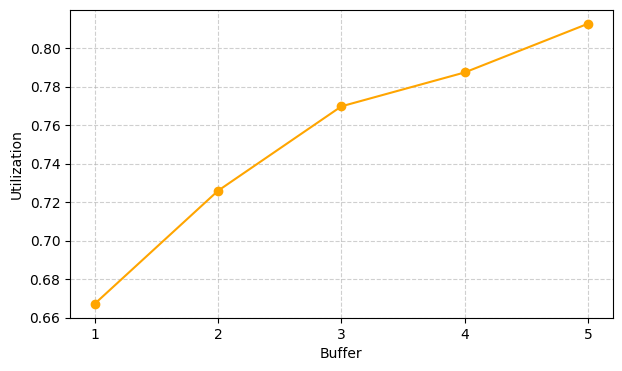

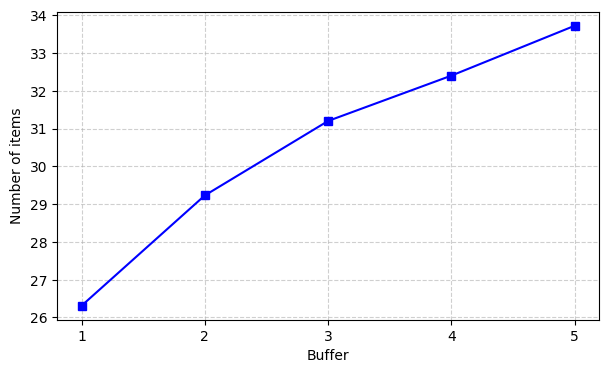

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu mẫu
x_labels = ['1', '2', '3', '4', '5']
x = np.arange(len(x_labels))
y1 = [0.6672, 0.7259, 0.7697, 0.7873, 0.8126]
y2 = [26.3100, 29.2300, 31.2000, 32.4000, 33.7200]

plt.figure(figsize=(7, 4))  # Tạo figure mới
plt.plot(x, y1, marker='o', linestyle='-', color='orange')
plt.xlabel("Buffer")
plt.ylabel("Utilization")
plt.xticks(x, x_labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()  # Hiển thị biểu đồ 1

# Biểu đồ 2
plt.figure(figsize=(7, 4))  # Tạo figure mới
plt.plot(x, y2, marker='s', linestyle='-', color='blue')
plt.xlabel("Buffer")
plt.ylabel("Number of items")
plt.xticks(x, x_labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()  # Hiển thị biểu đồ 2
